In [1]:
import tensorflow as tf
import gym
import model
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# 動画の描画関数の宣言
# 参考URL http://nbviewer.jupyter.org/github/patrickmineault
# /xcorr-notebooks/blob/master/Render%20OpenAI%20gym%20as%20GIF.ipynb
from JSAnimation.IPython_display import display_animation
from matplotlib import animation
from IPython.display import display
from emulator import Emulator

In [2]:
def display_frames_as_gif(frames, env):
    """
    Displays a list of frames as a gif, with controls
    """
    #plt.figure(figsize=(frames[0].shape[1]/72.0, frames[0].shape[0]/72.0),
    #           dpi=72)
    #plt.figure(figsize=(env.screen_y, env.screen_x))
    plt.figure(figsize=(8,8))
    patch = plt.imshow(frames[0])
    plt.axis('off')
 
    def animate(i):
        patch.set_data(frames[i])
 
    anim = animation.FuncAnimation(plt.gcf(), animate, frames=len(frames),
                                   interval=50)
 
    #anim.save('movie_cartpole.mp4')  # 追記：動画の保存です
    display(display_animation(anim, default_mode='loop'))

In [3]:
#Learned model testing.
sess = tf.Session()
#env = gym.make('CartPole-v0')
env = Emulator()

q_network  = model.Dqn(sess=sess, env=env, name="main")

sess.run(tf.global_variables_initializer())

saver = tf.train.Saver()
saver.restore(sess, "/Users/kenshi/PycharmProjects/DeepQNetwork_CNN/model/8-6-21-57/model.ckpt")

frames = []
for i in range(10):

    env.reset()
    state, _, _ = env.observe()

    terminal = False
    while not terminal:
        #frames.append(env.render(mode='rgb_array'))
        frames.append(env.render())
    
        action = q_network.actions[np.argmax(q_network.q(state))]
        next_state, reward, terminal, info = env.step(action)
    
        state = next_state  
#for step in range(0, 200):
#    frames.append(env.render(mode='rgb_array'))  # framesに各時刻の画像を追加していく
#    action = np.random.choice(2)  # 0(カートを左に押す),1(カートを右に押す)をランダムに返す
#    observation, reward, done, info = env.step(action)  # actionを実行する

INFO:tensorflow:Restoring parameters from /Users/kenshi/PycharmProjects/DeepQNetwork_CNN/model/8-6-21-57/model.ckpt



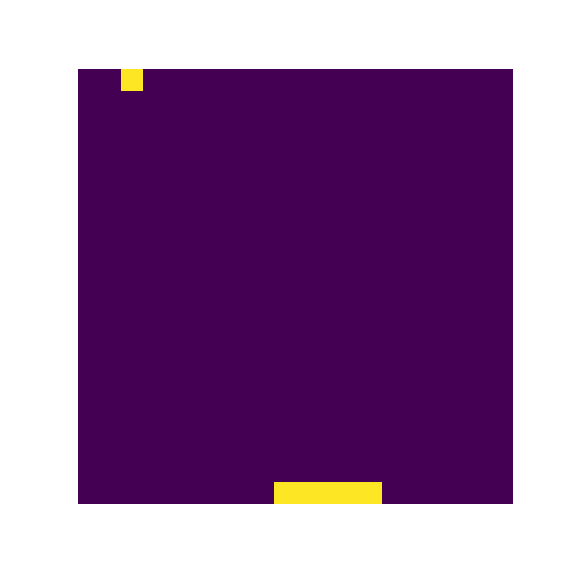
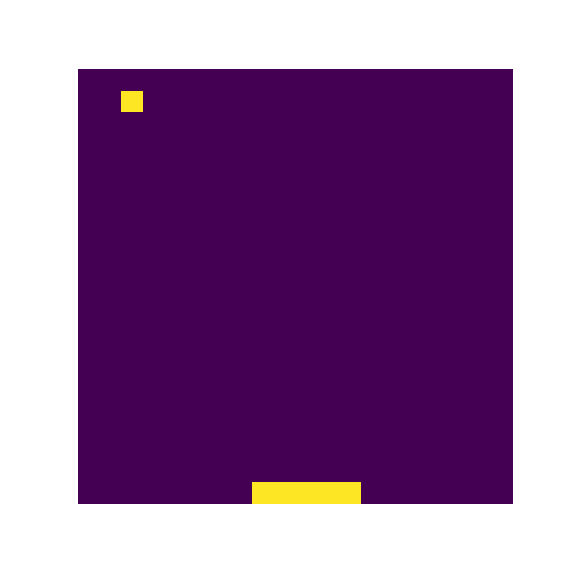
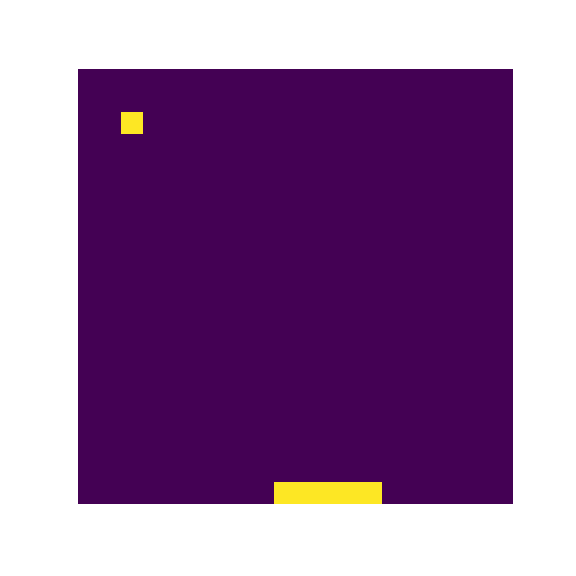
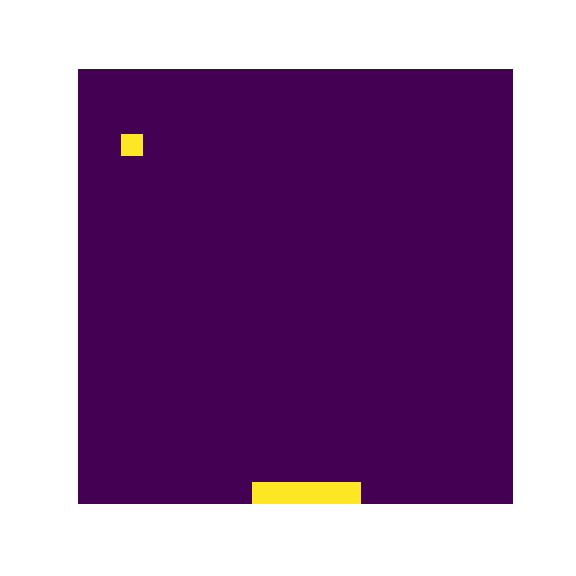
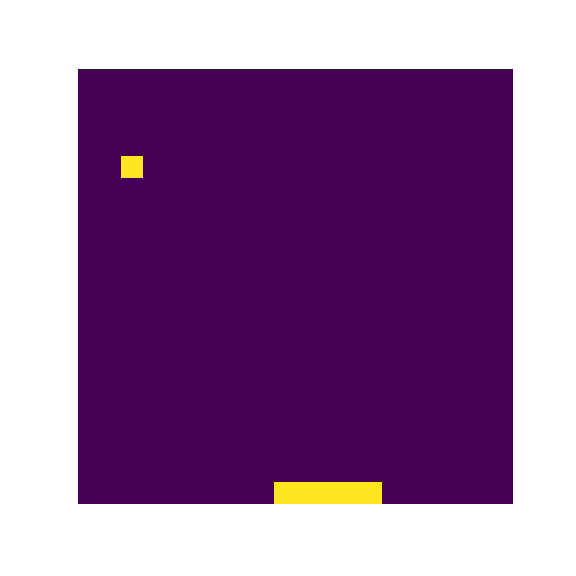
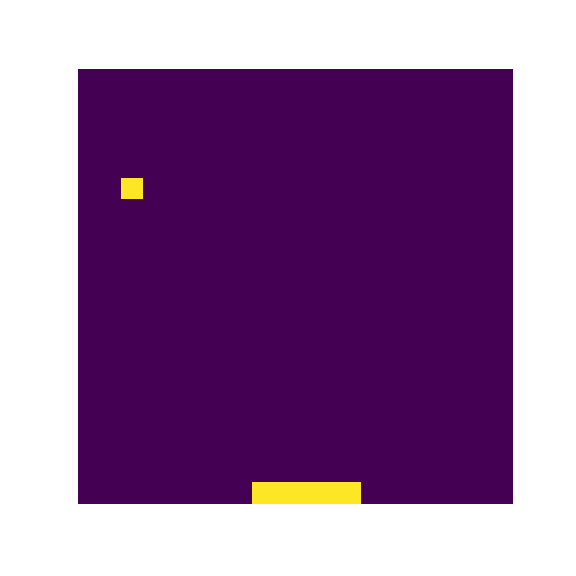
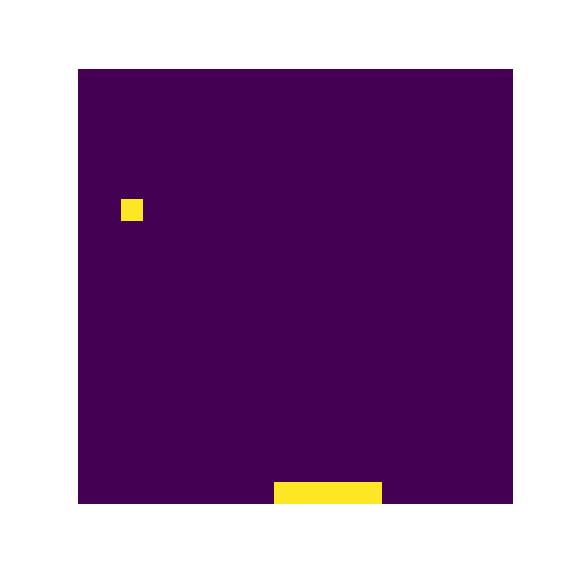
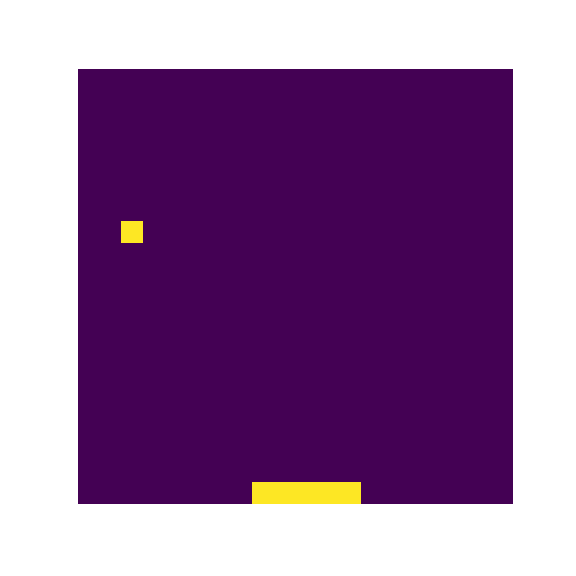
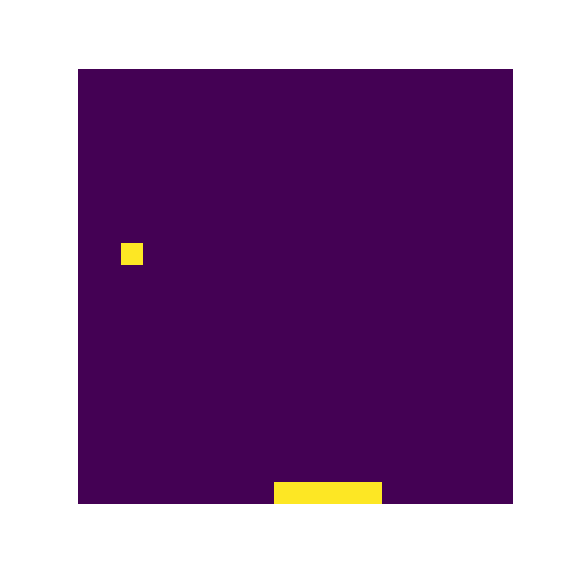
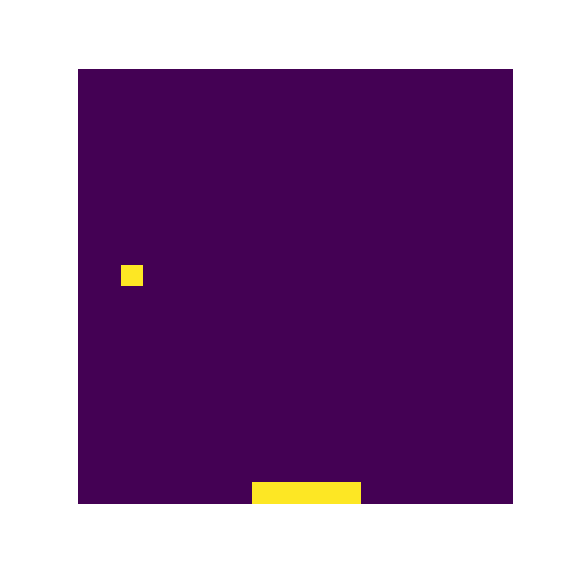
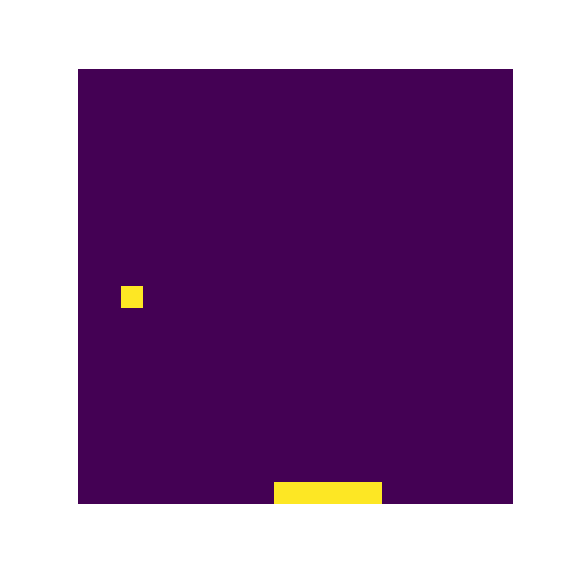
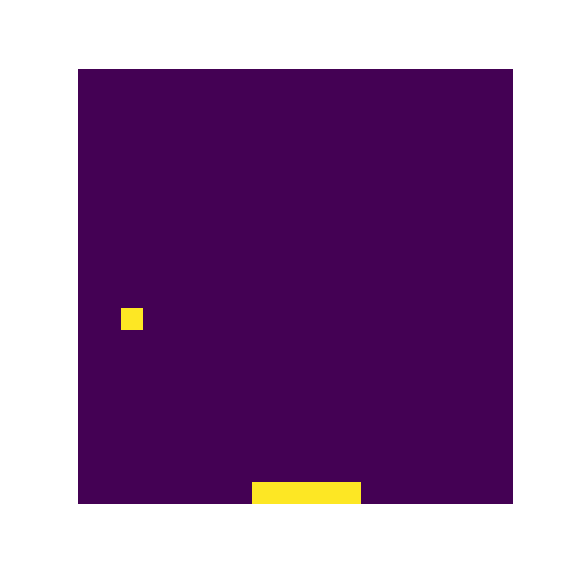
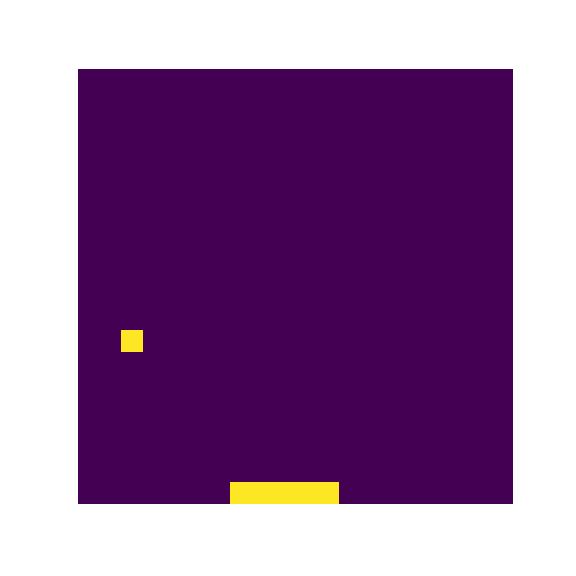
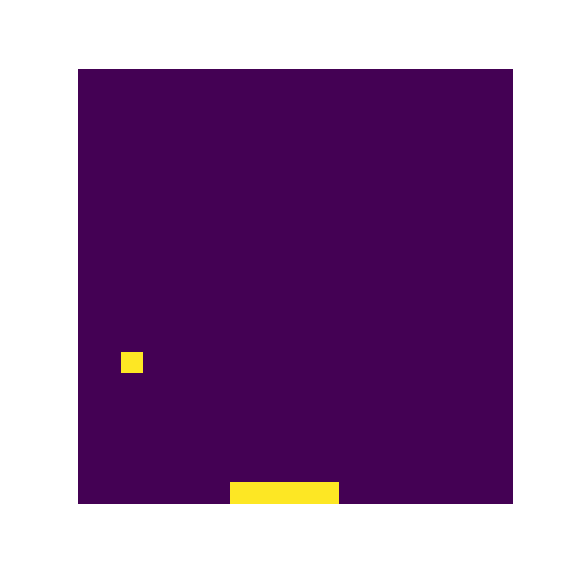
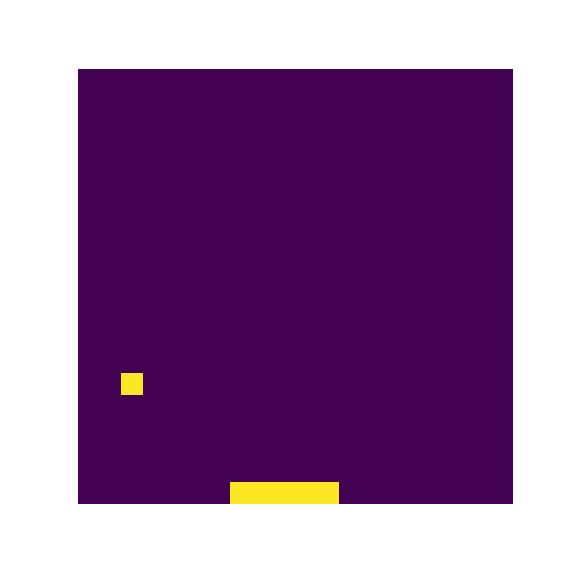
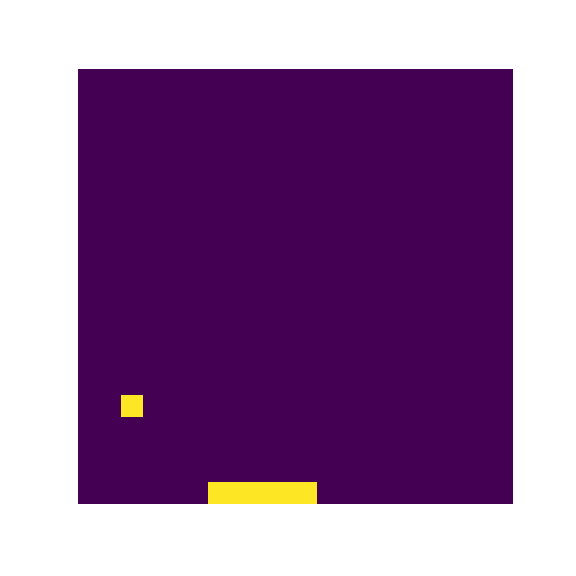
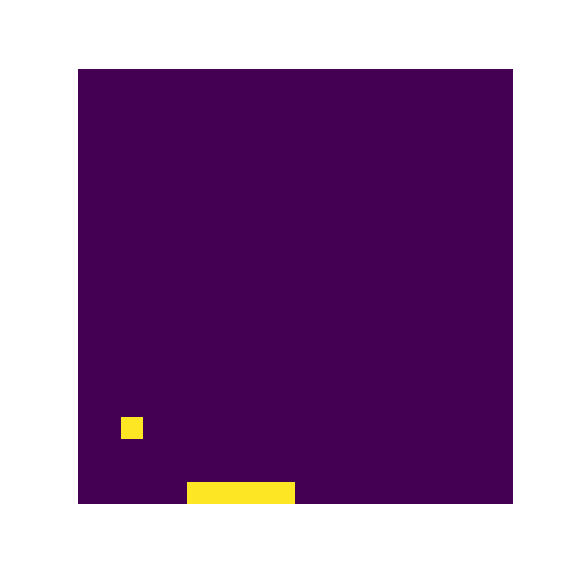
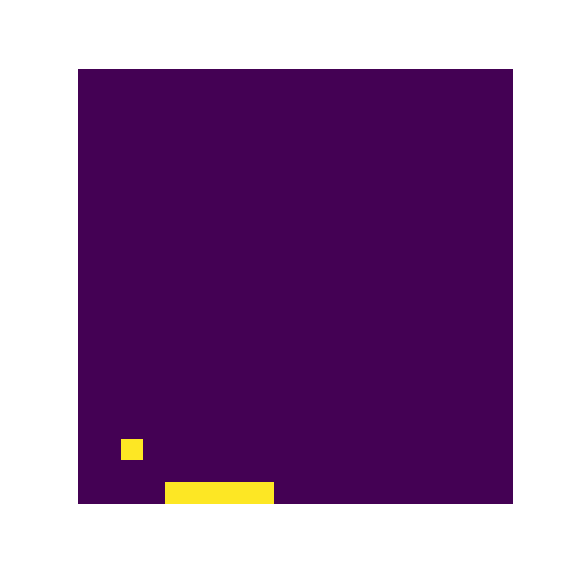
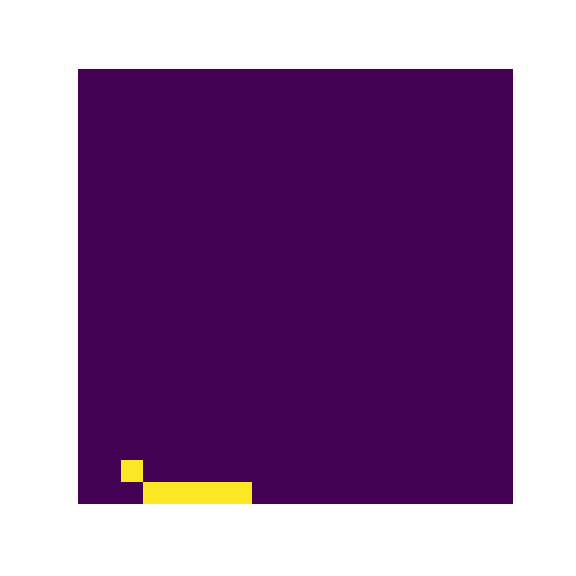
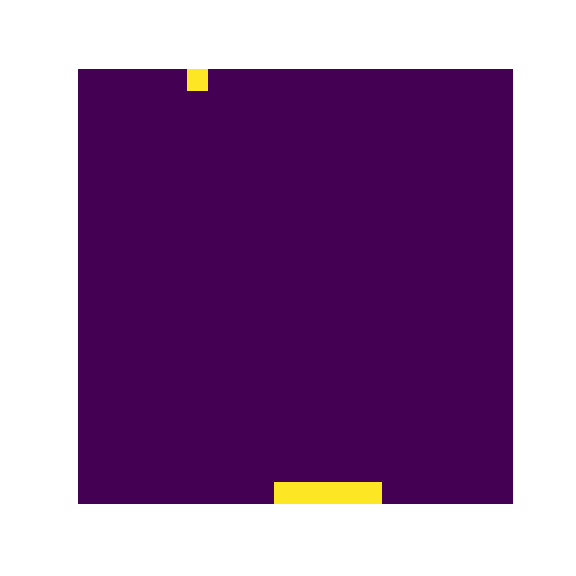
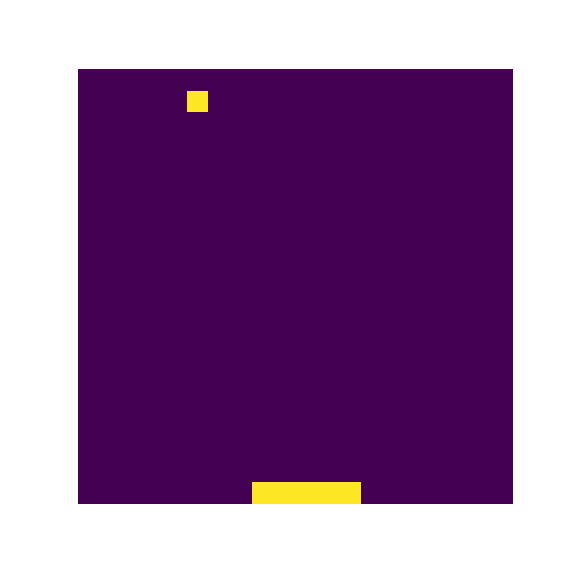
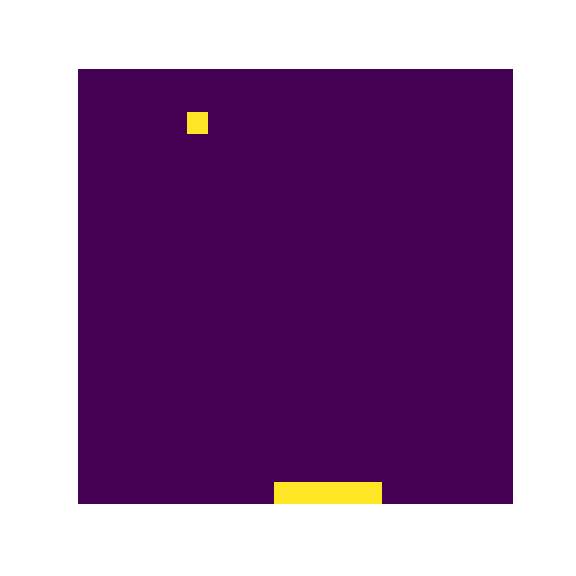
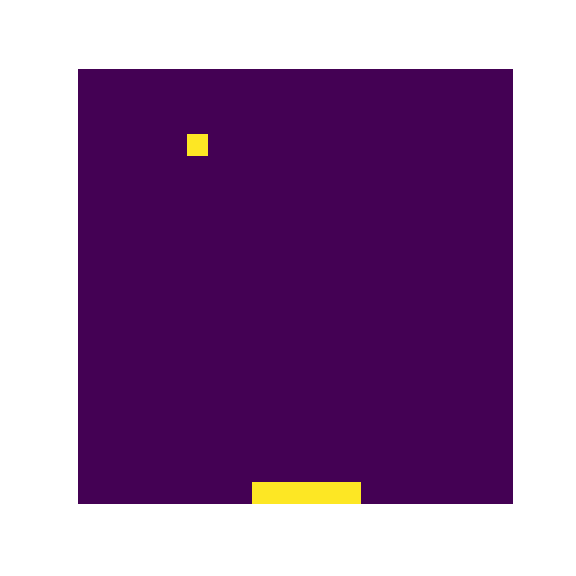
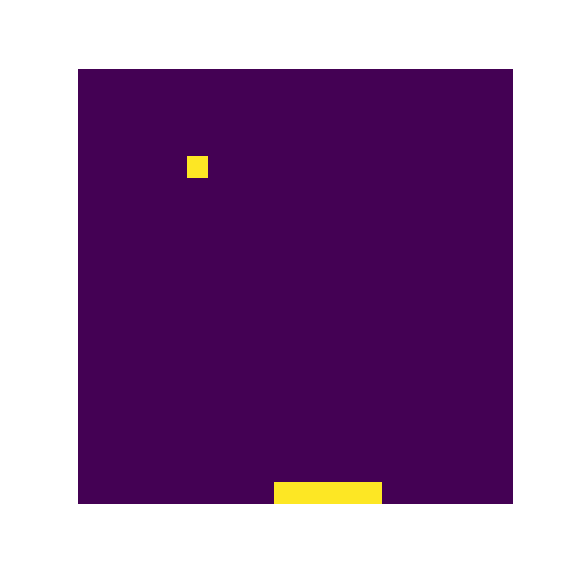
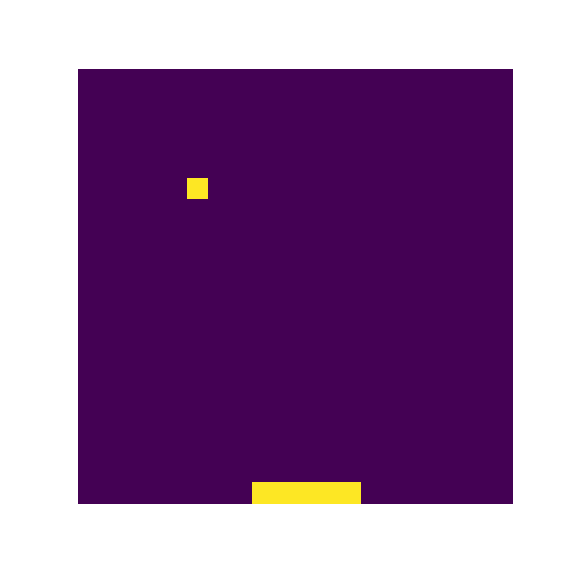
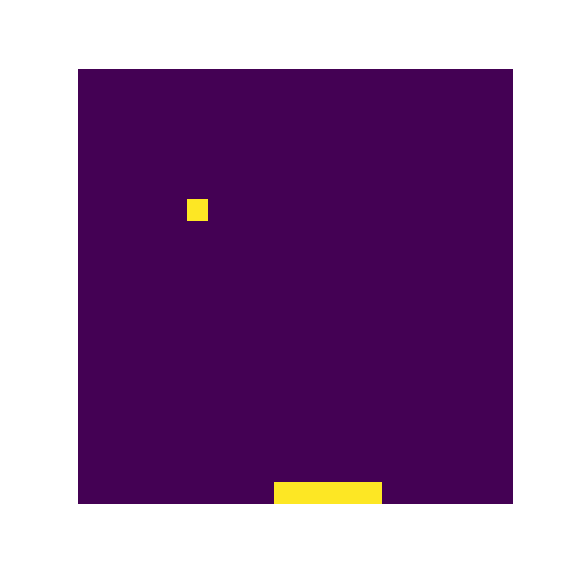
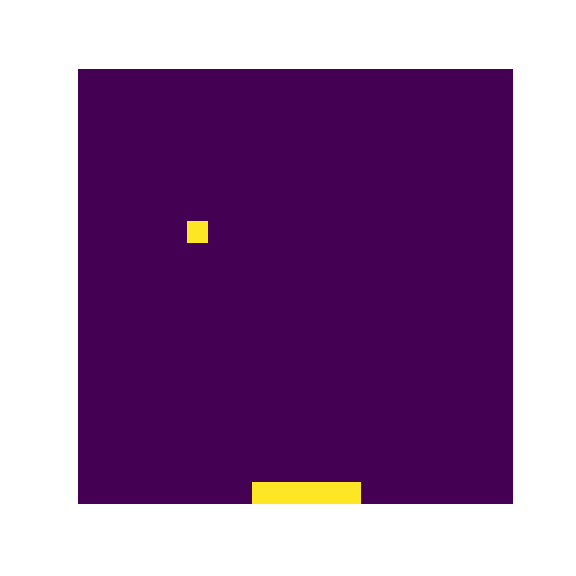
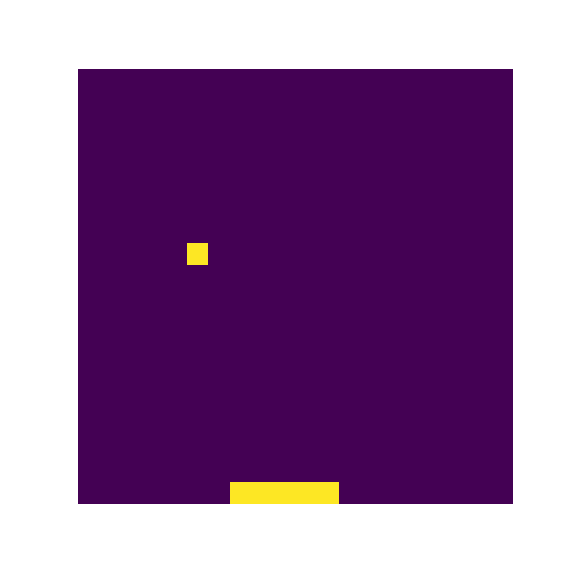
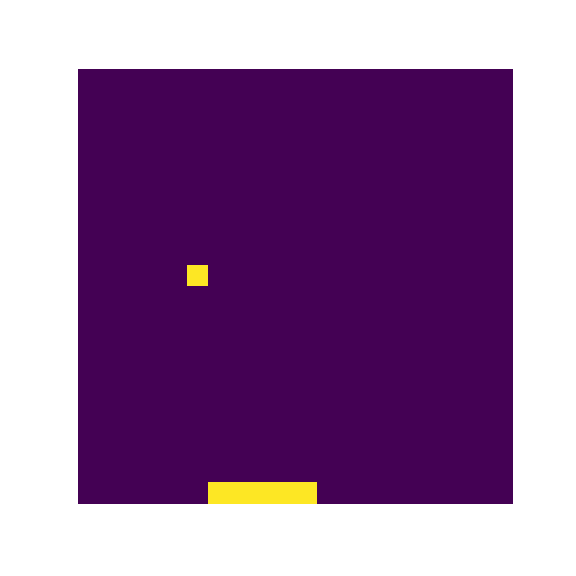
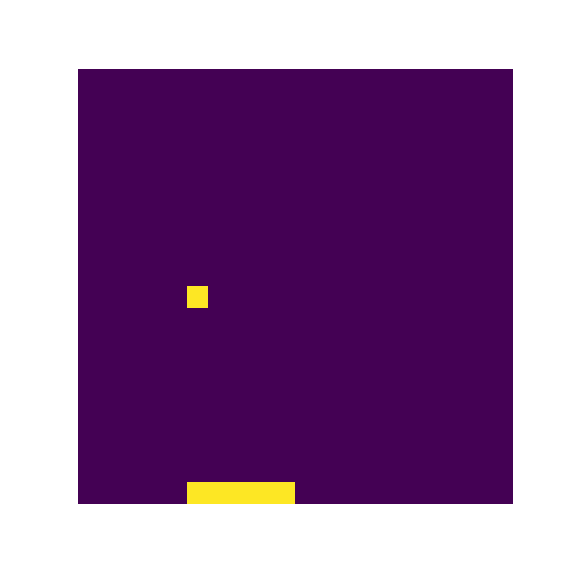
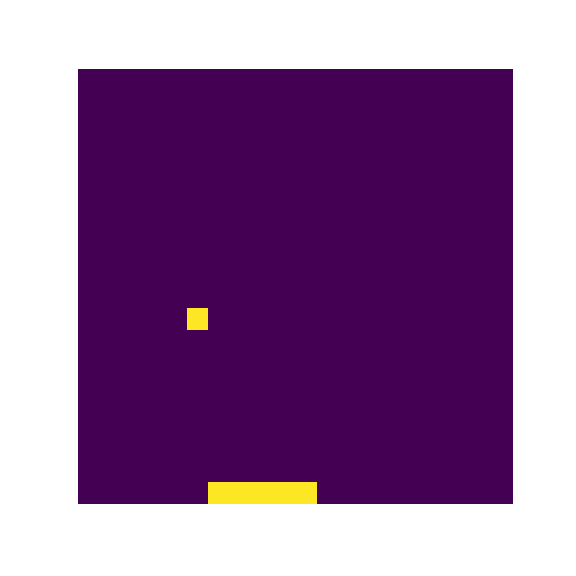
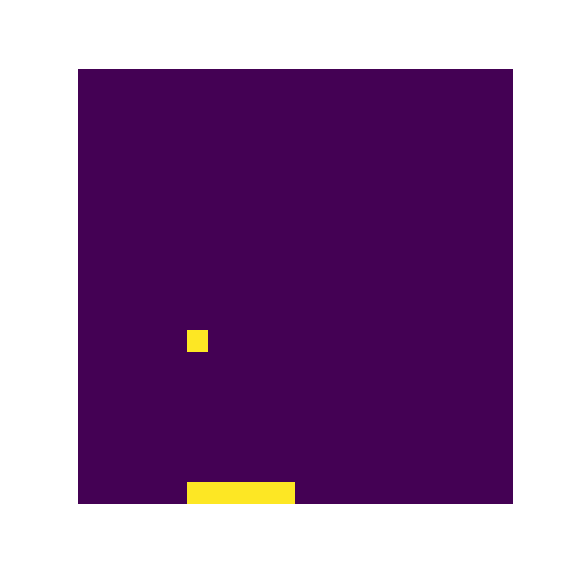
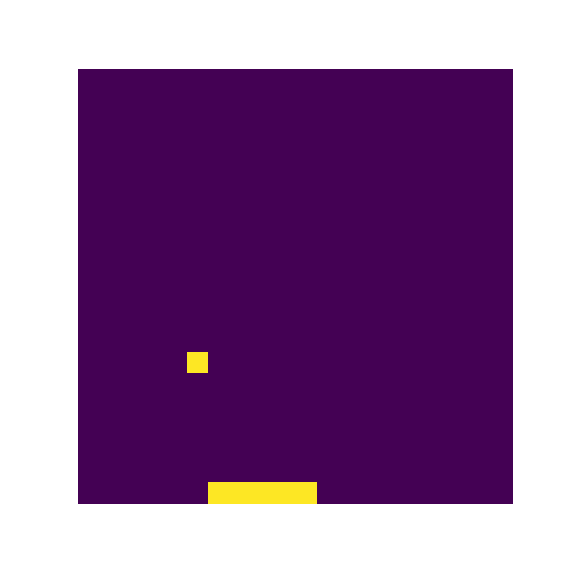
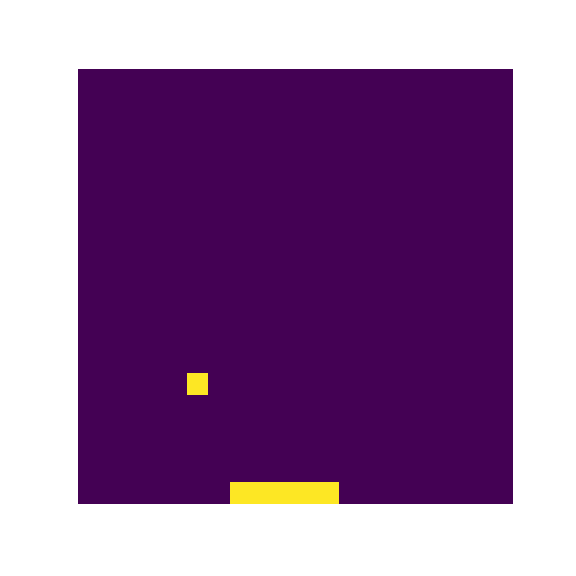
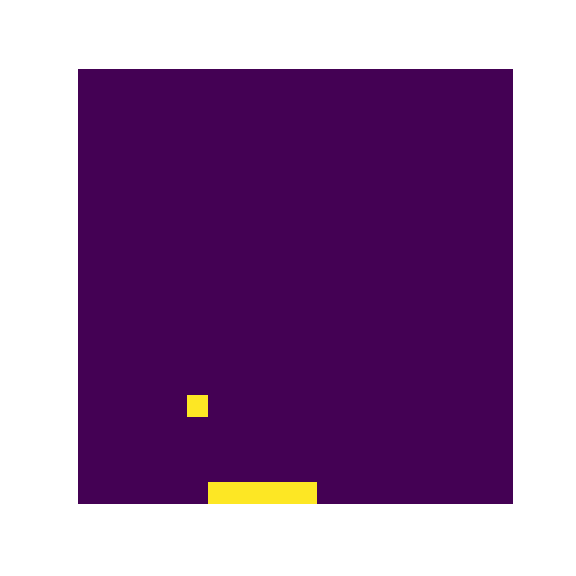
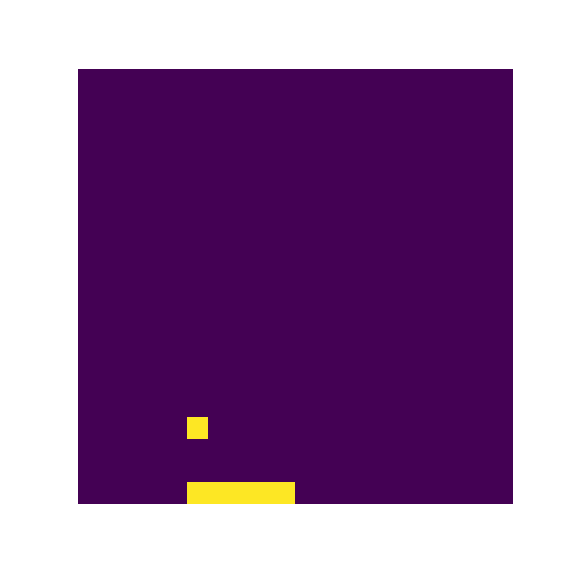
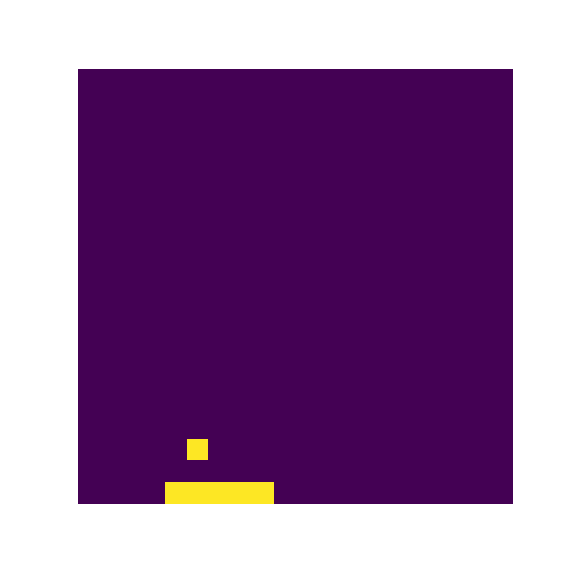
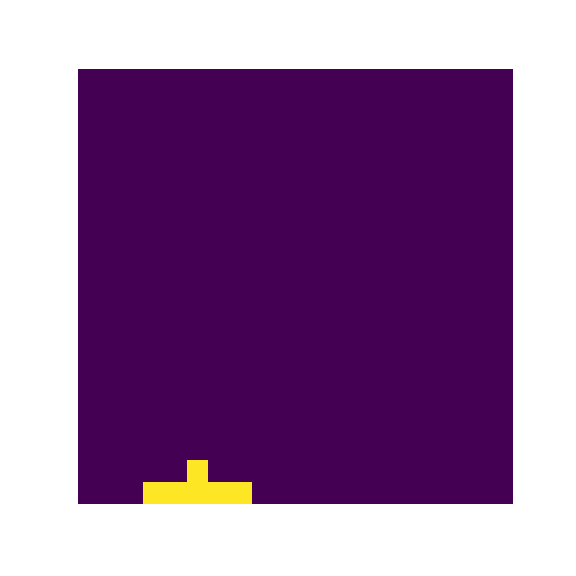
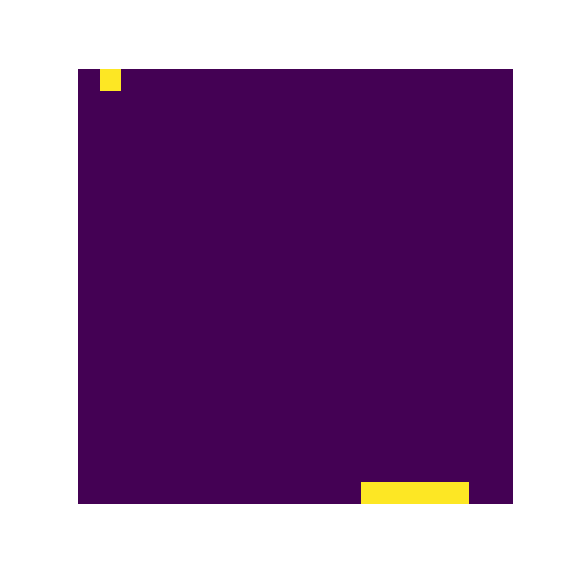
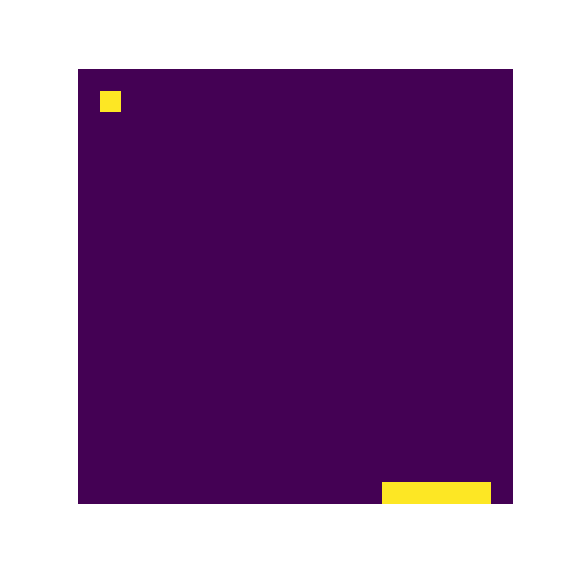
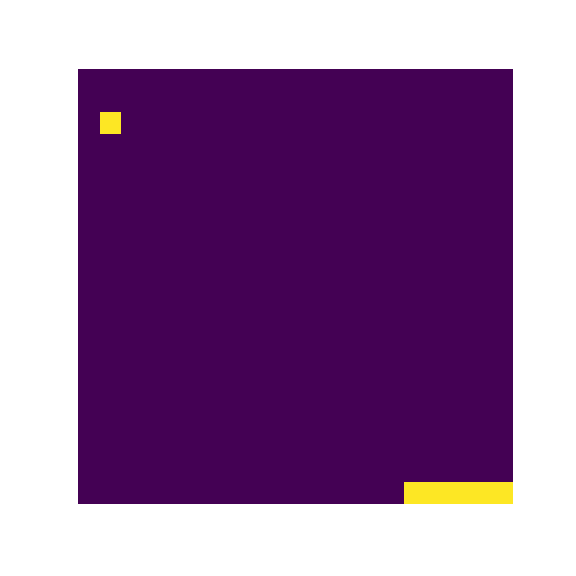
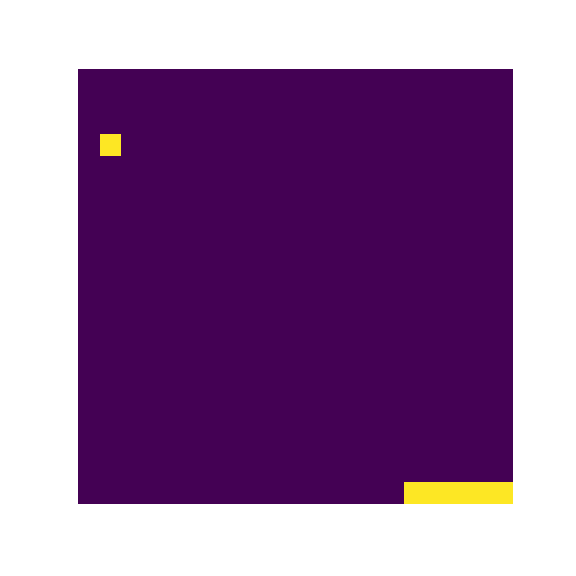
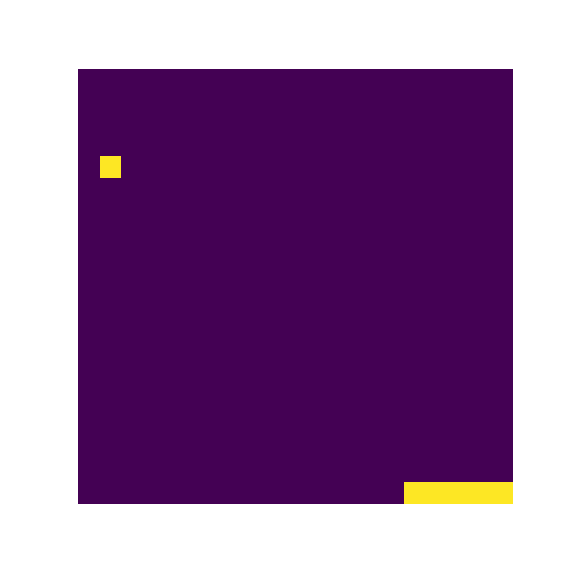
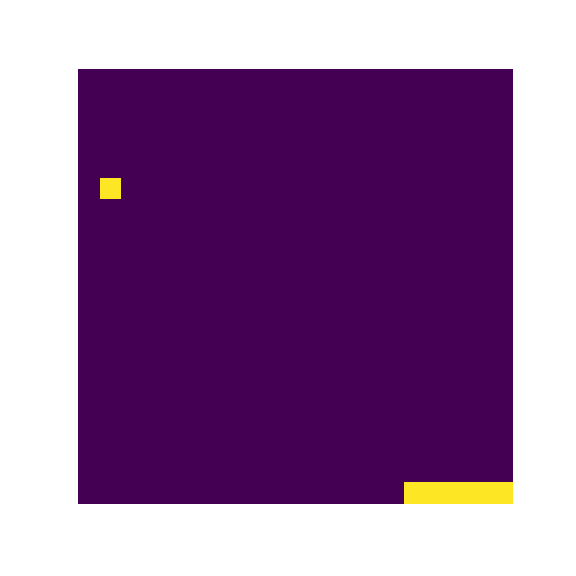
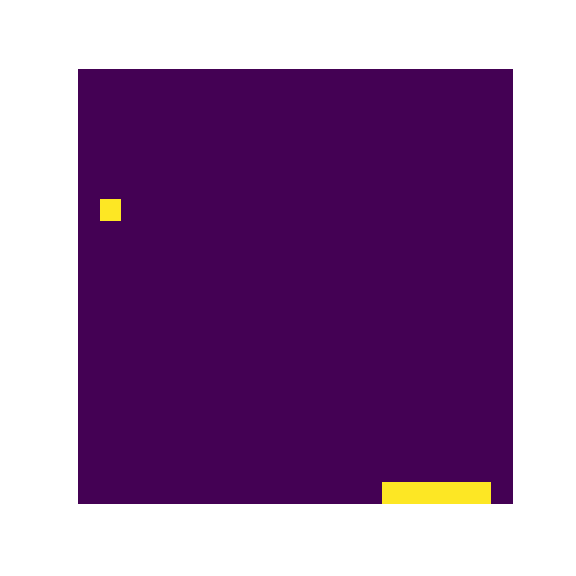
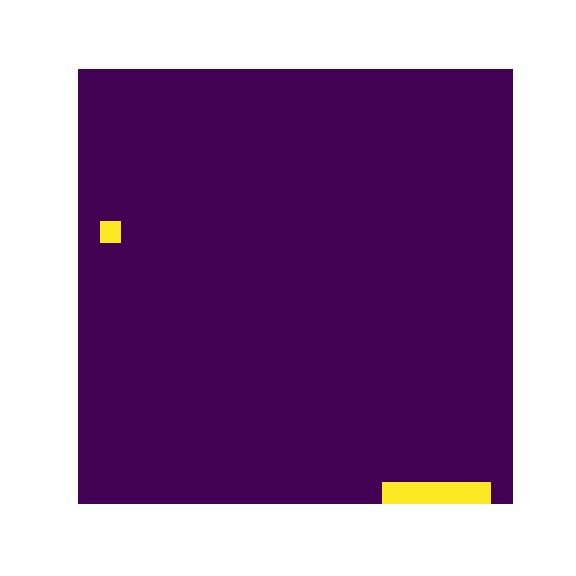
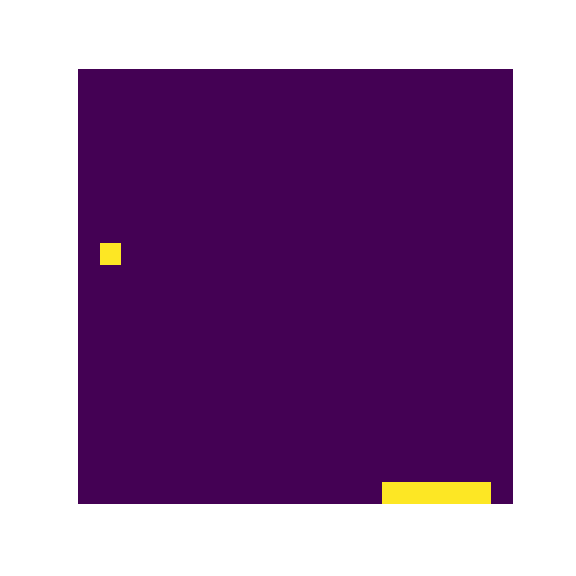
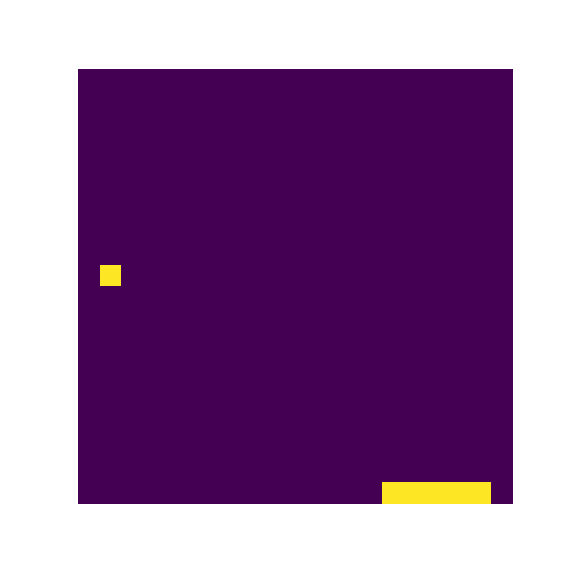
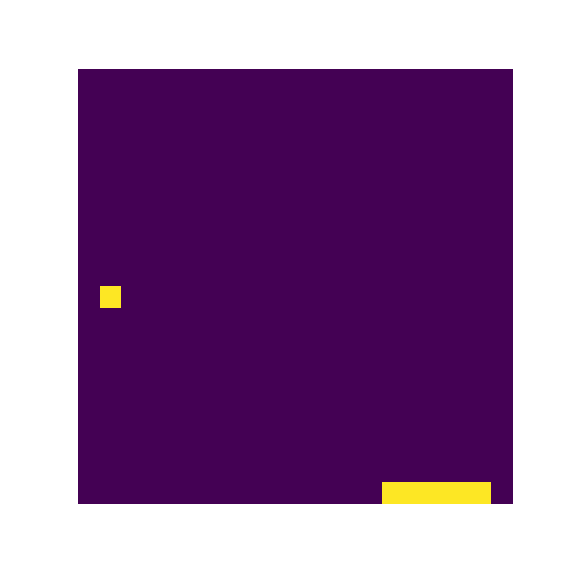
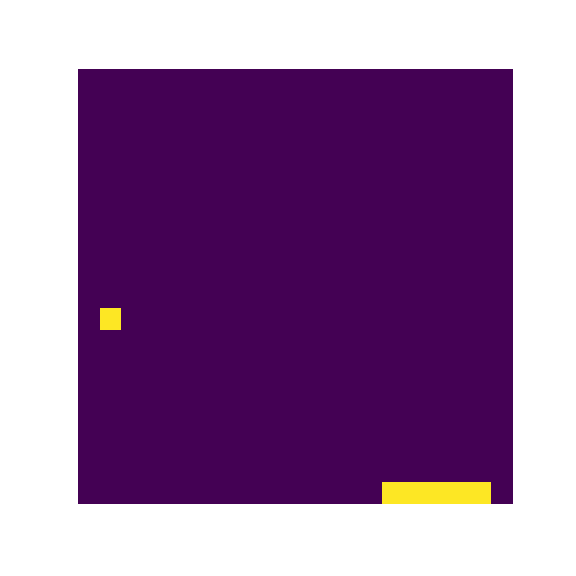
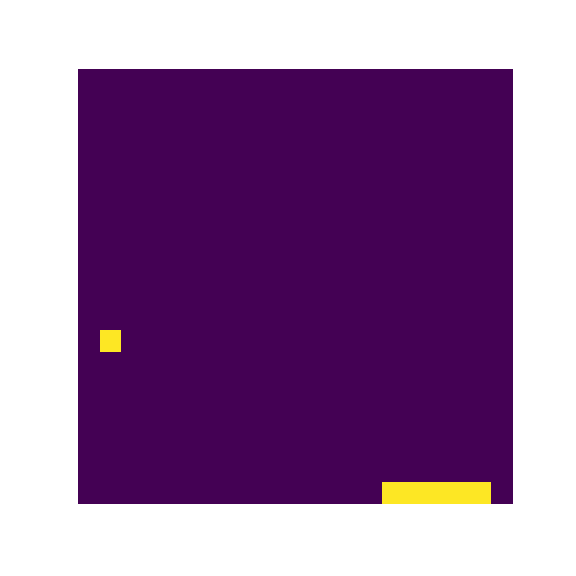
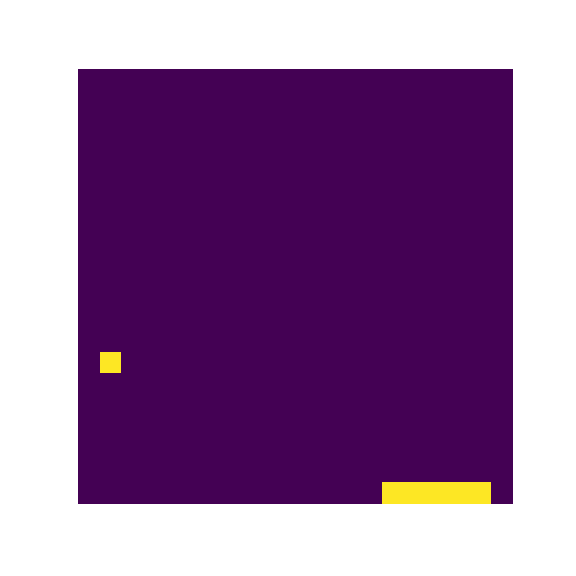
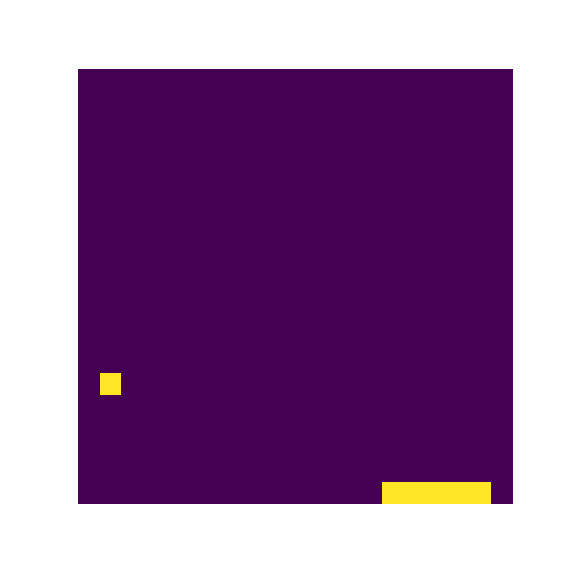
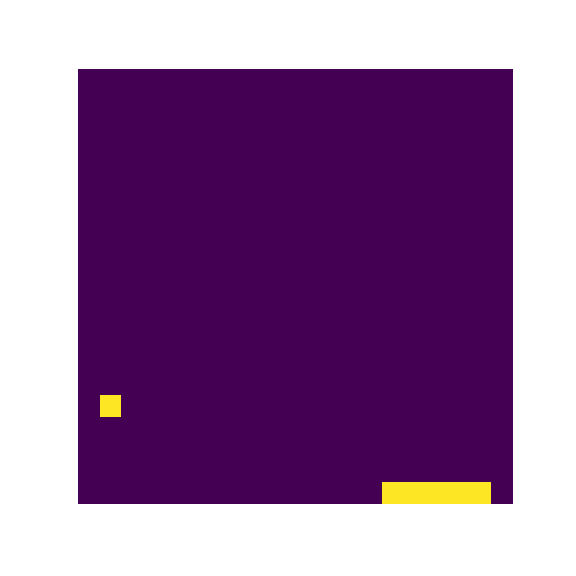
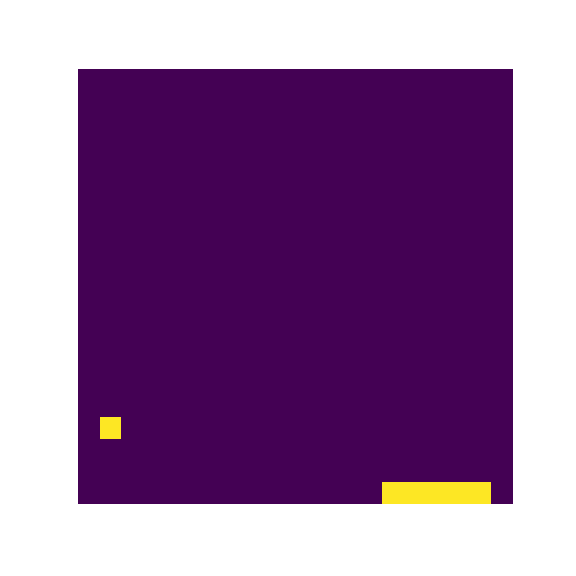
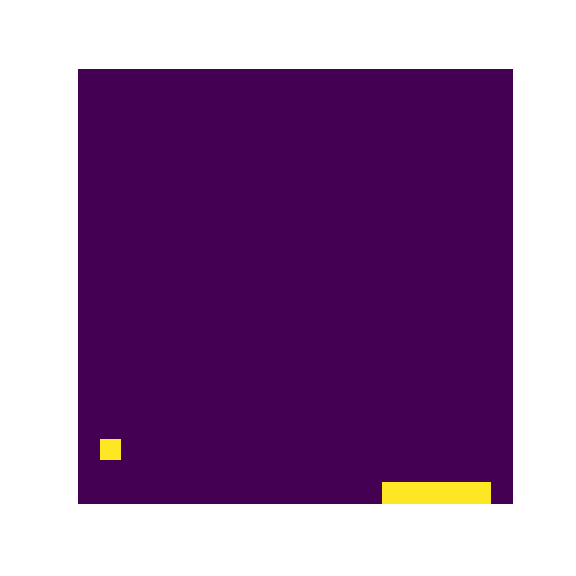
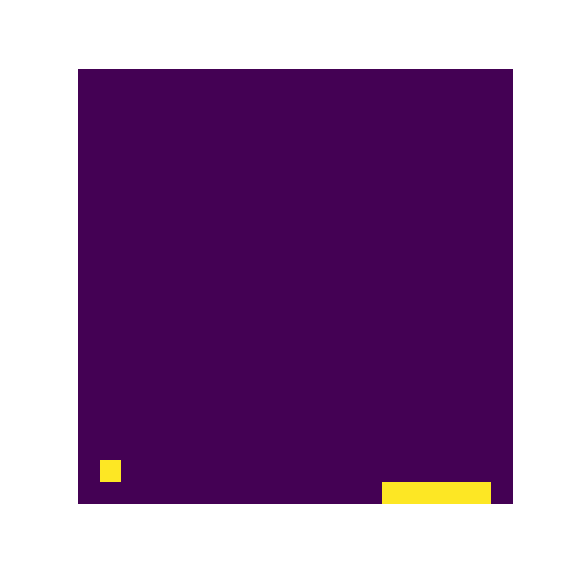
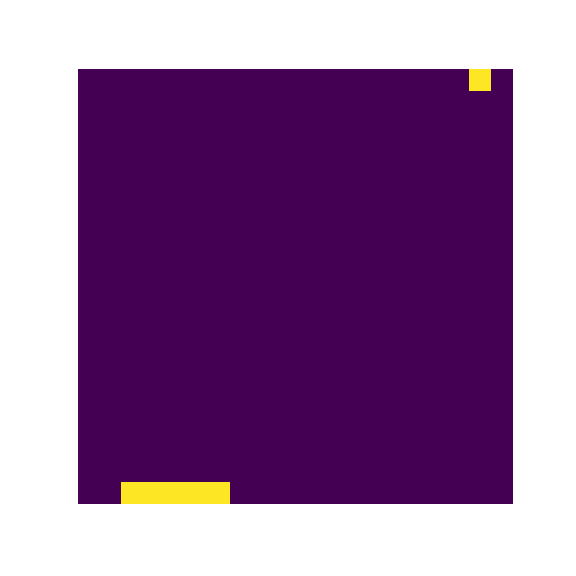
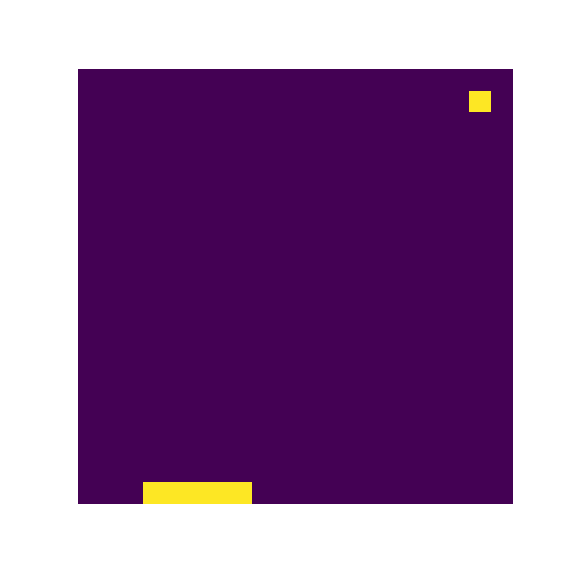
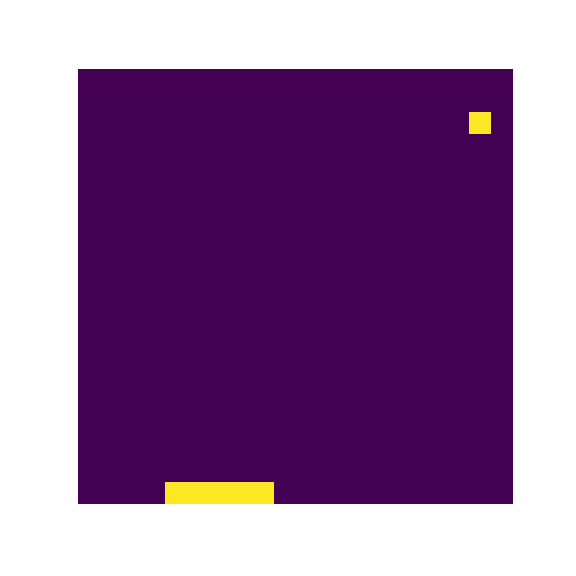
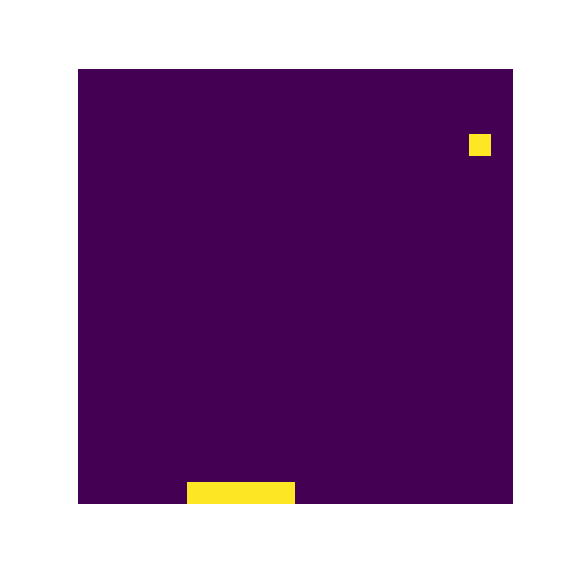
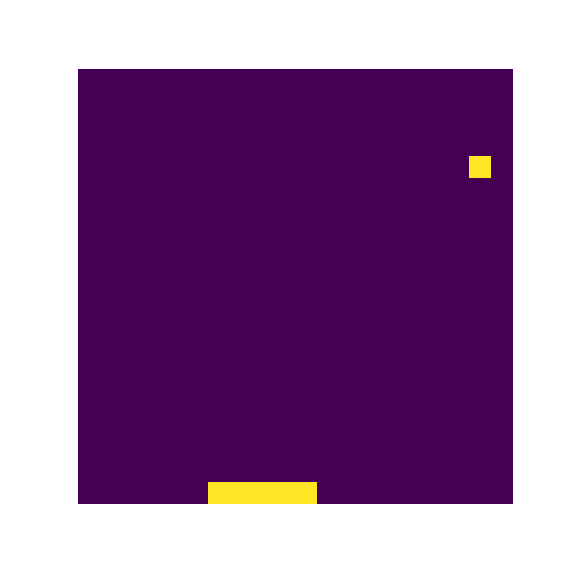
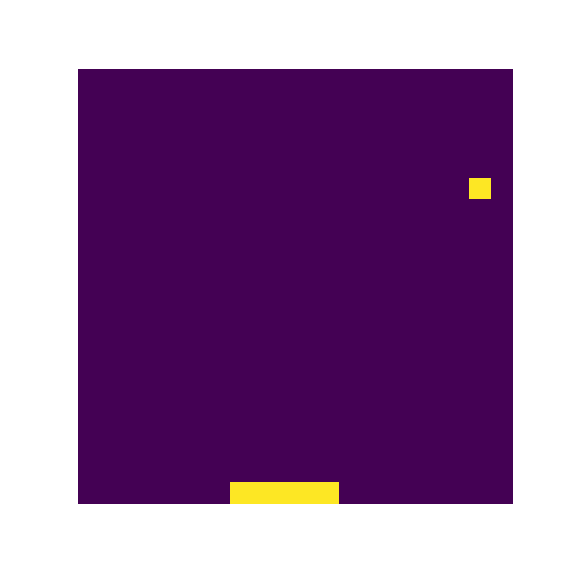
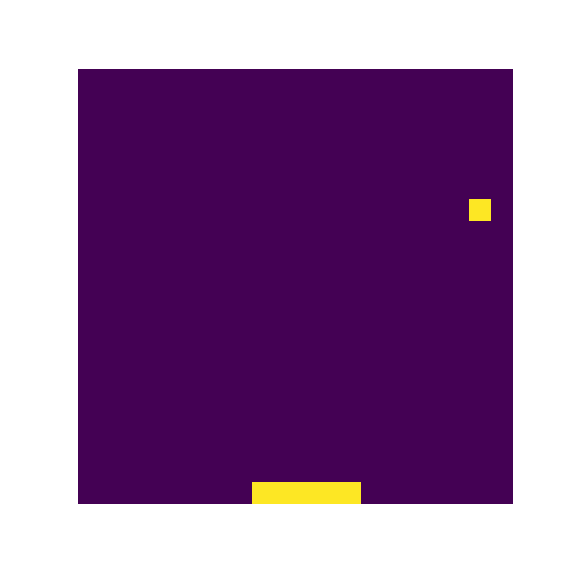
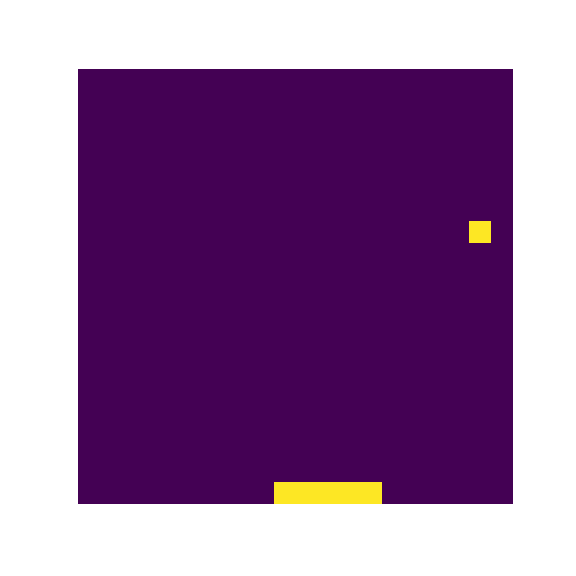
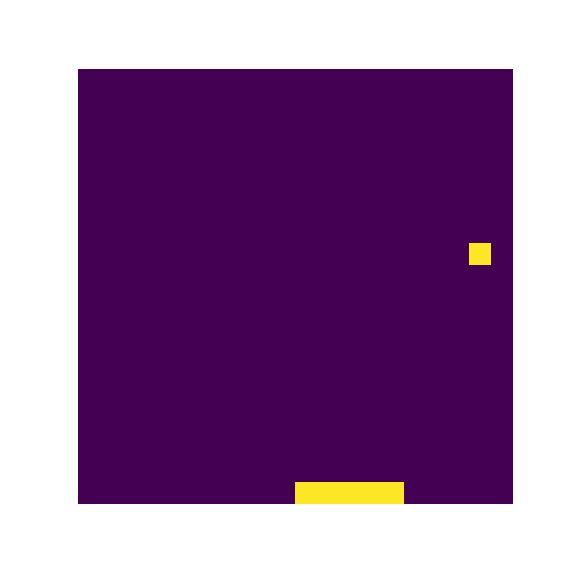
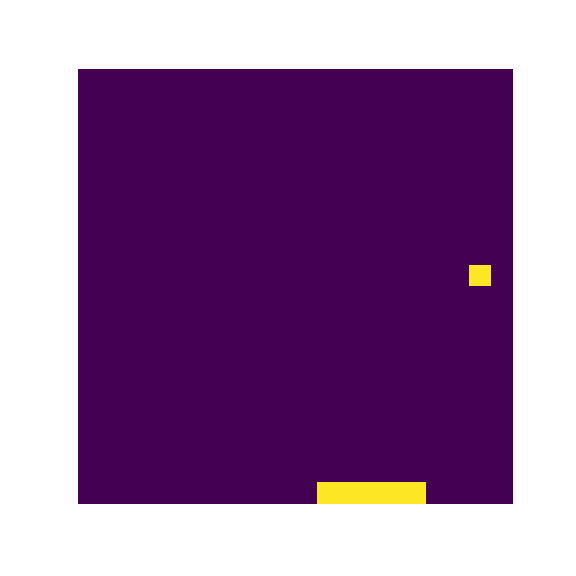
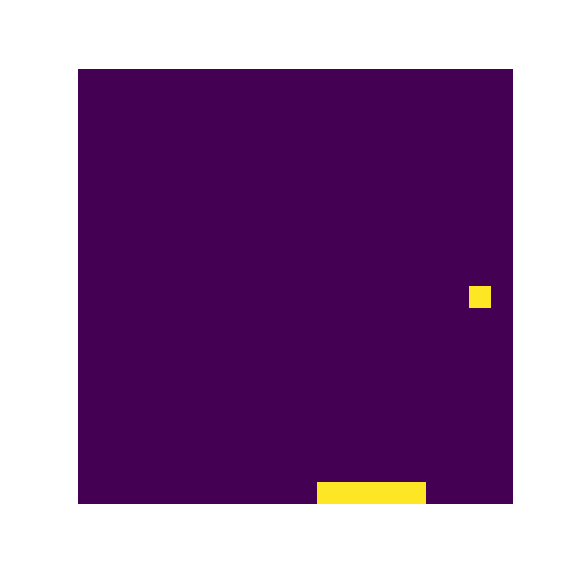
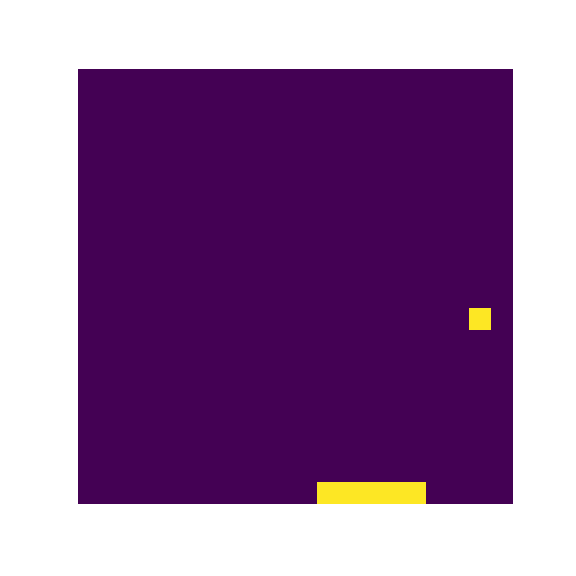
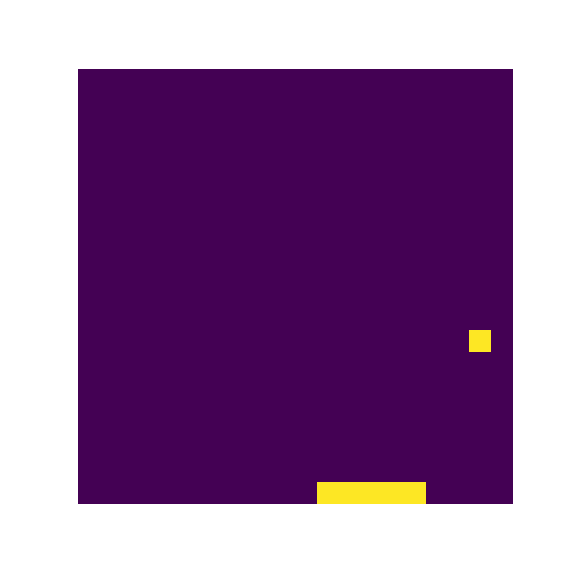
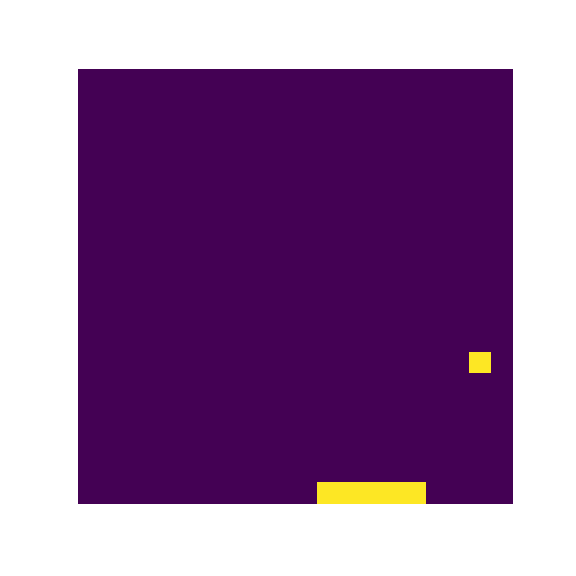
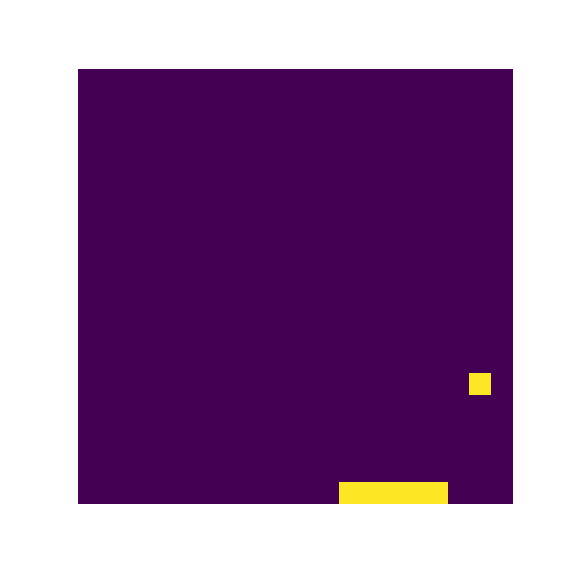
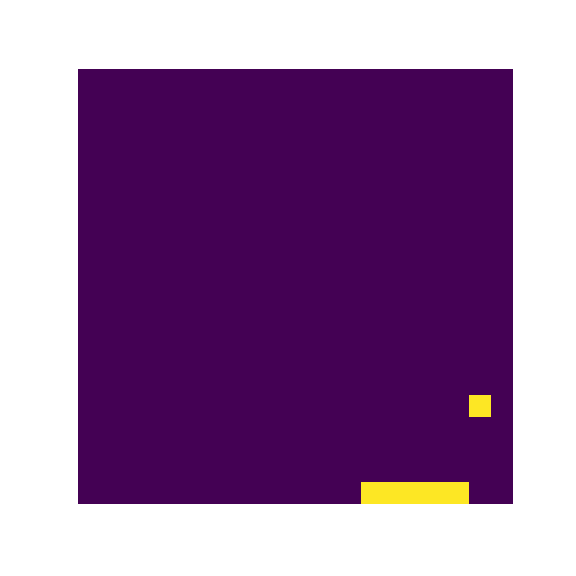
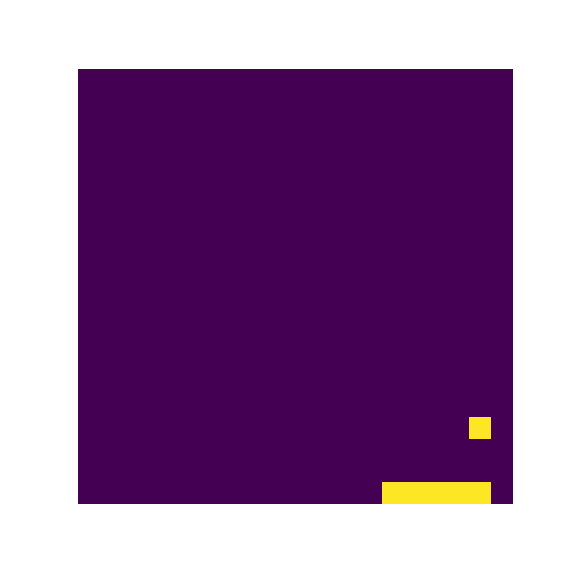
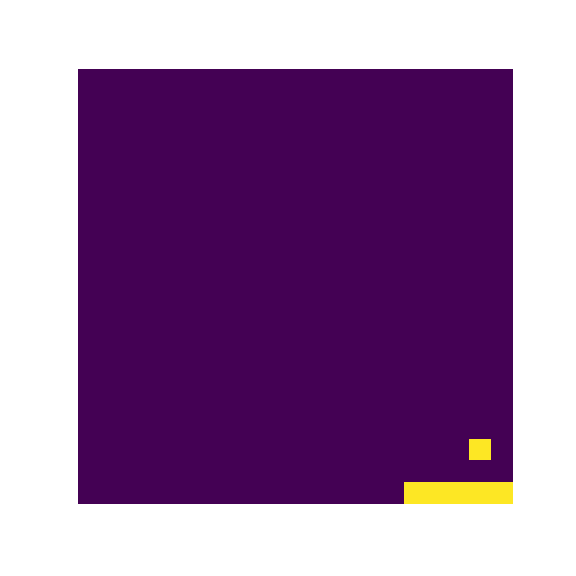
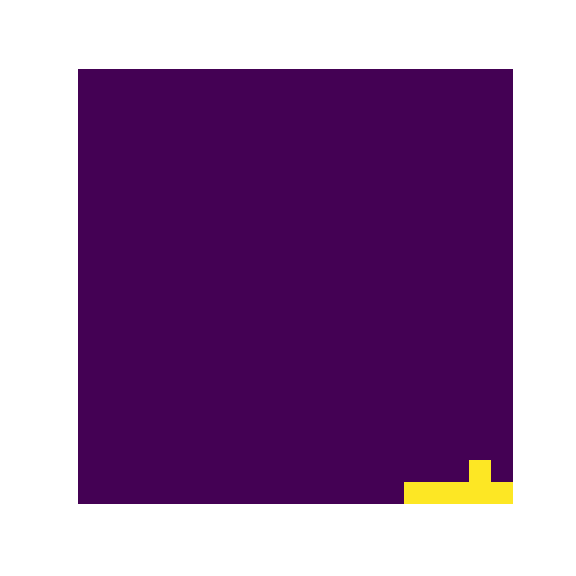
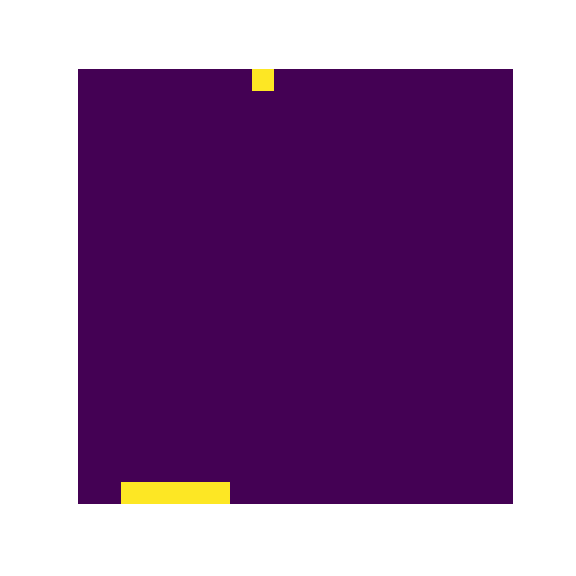
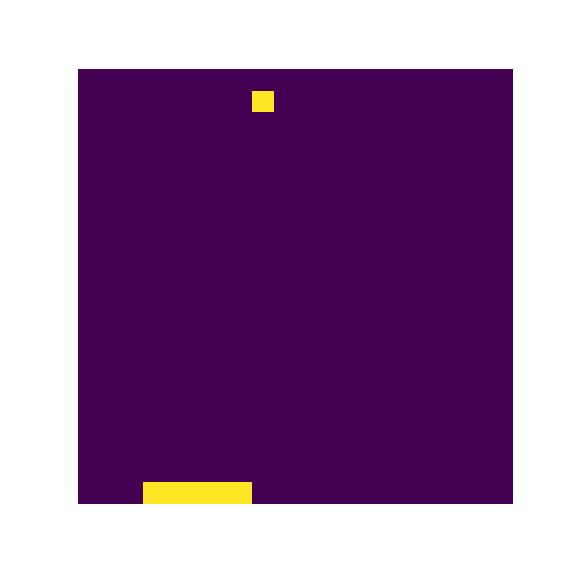
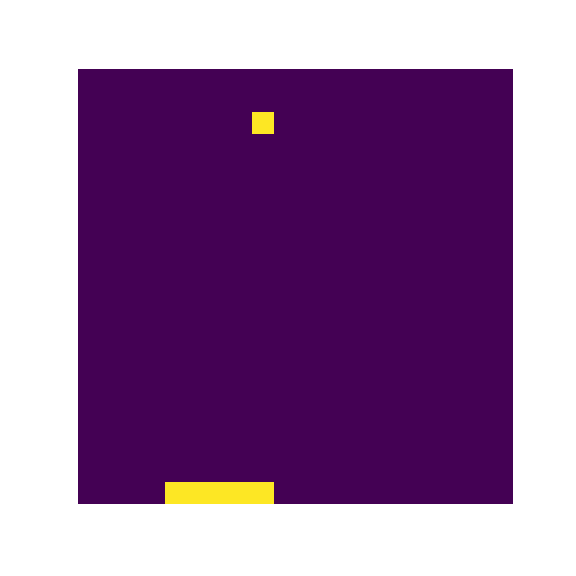
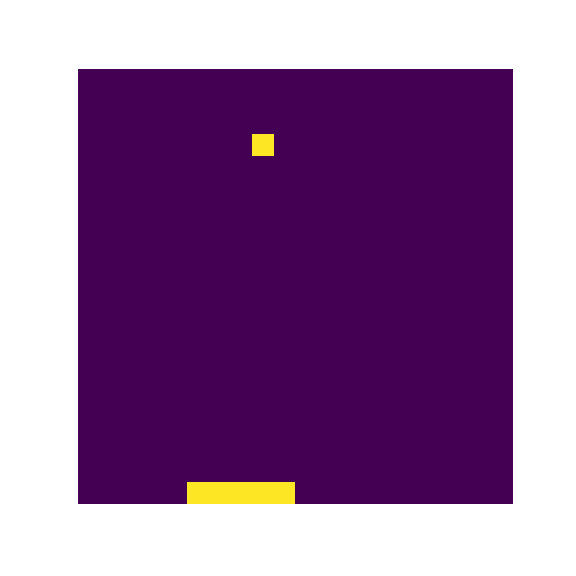
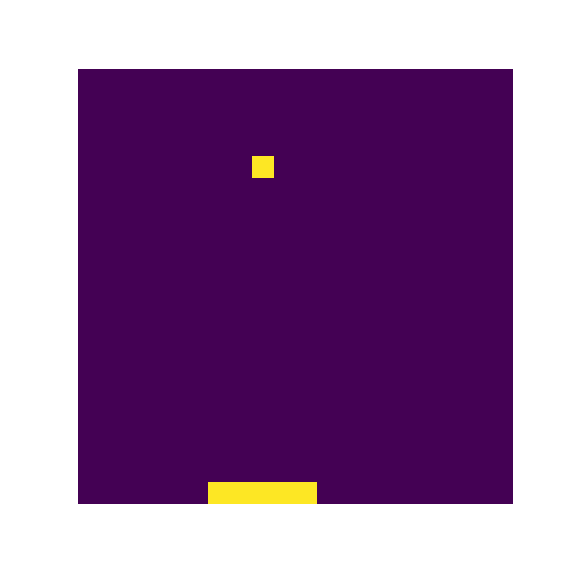
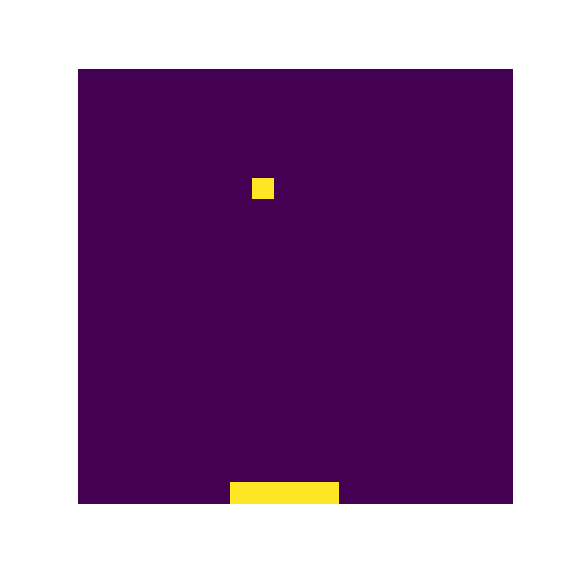
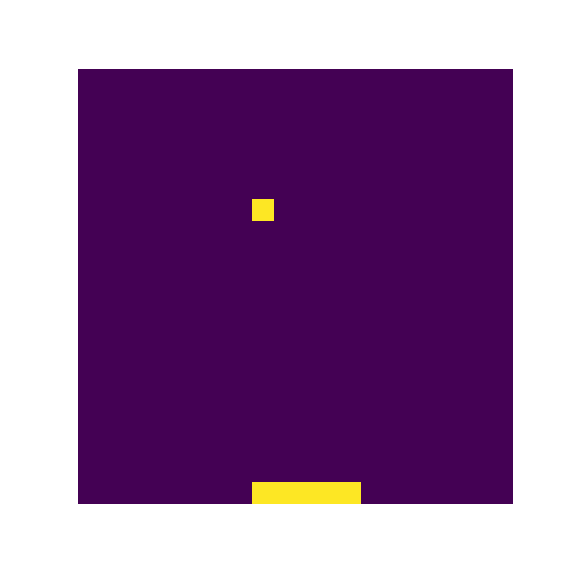
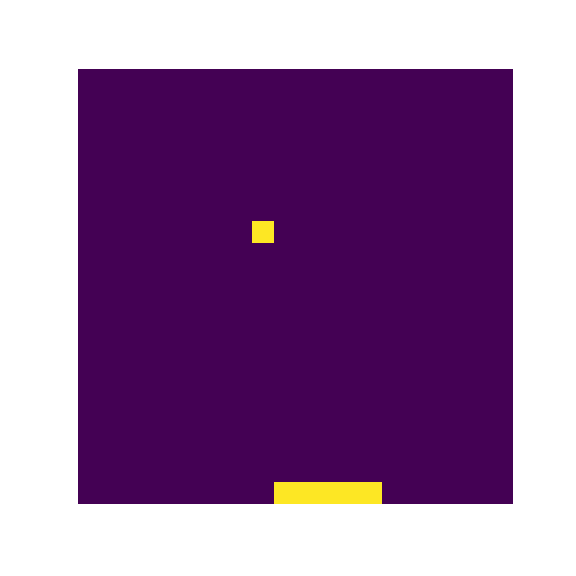
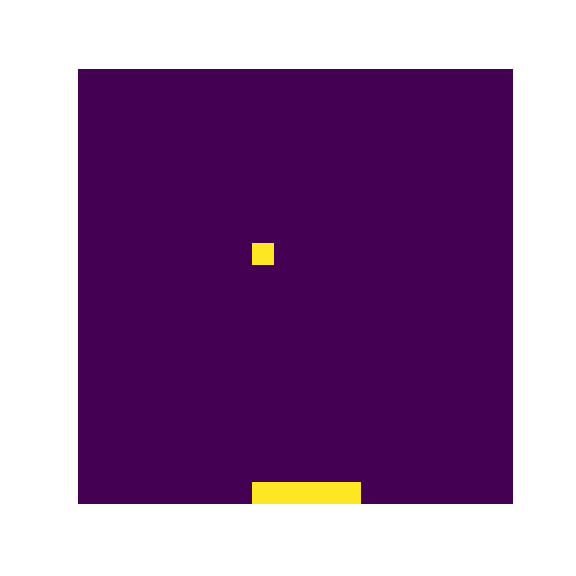
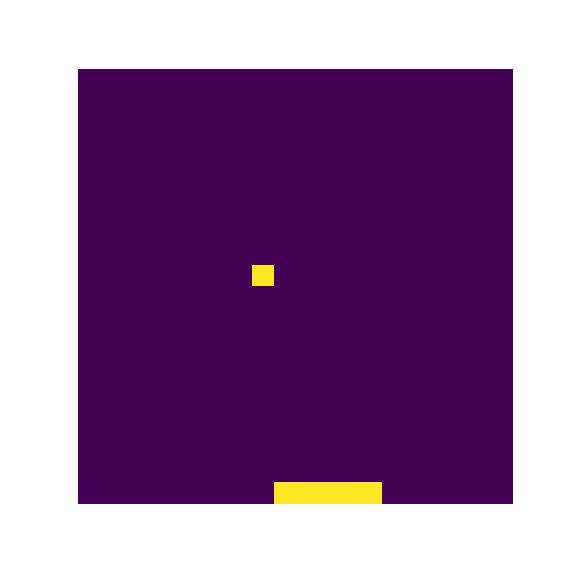
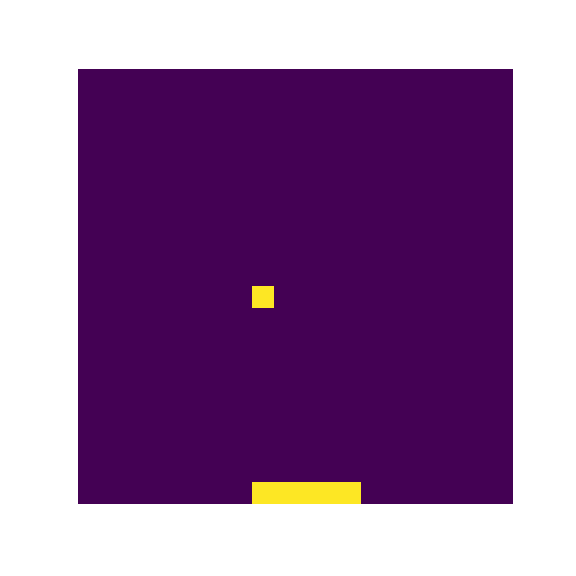
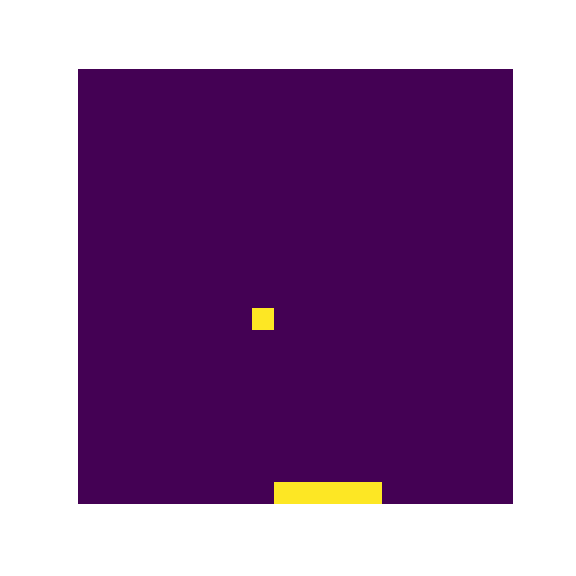
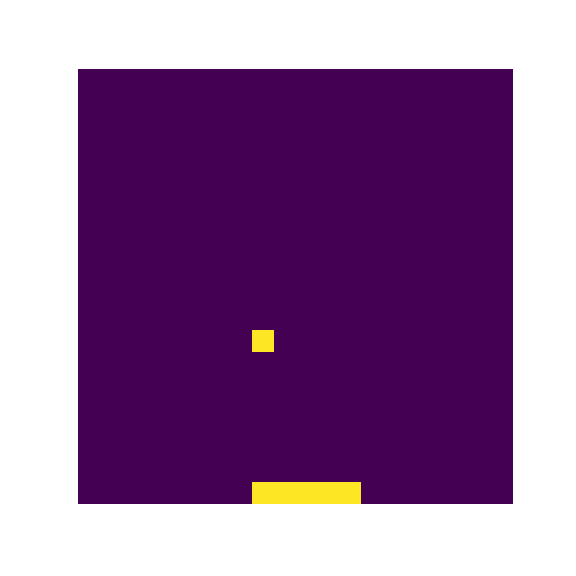
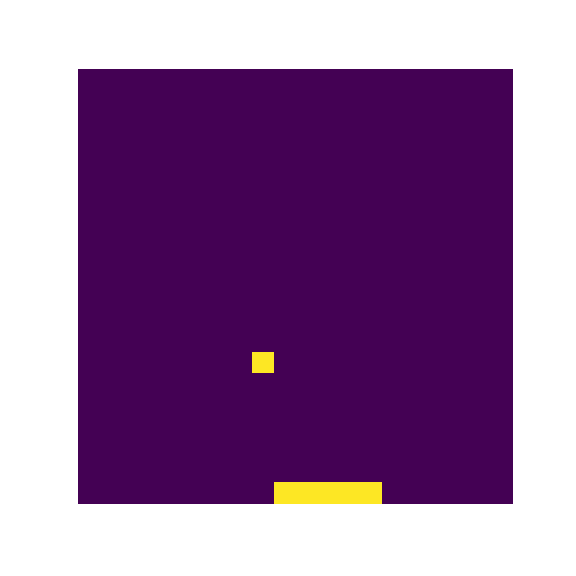
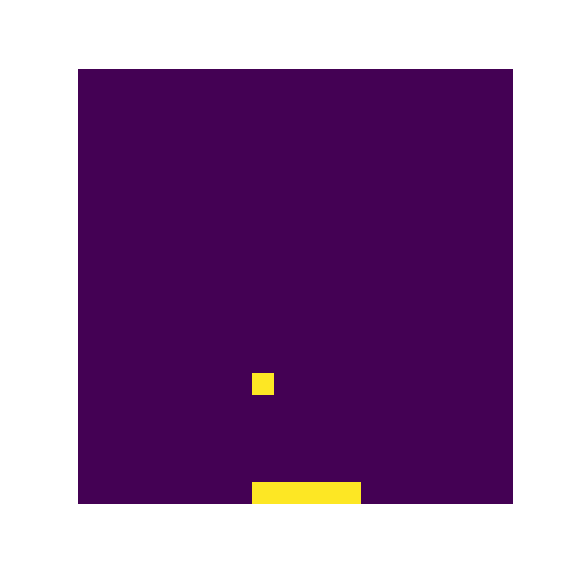
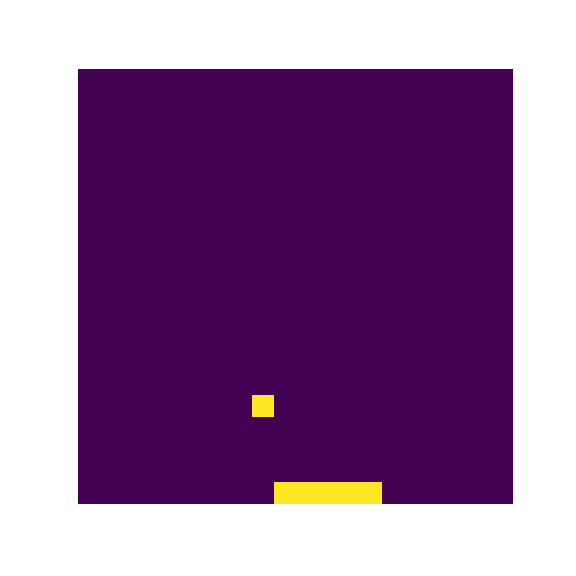
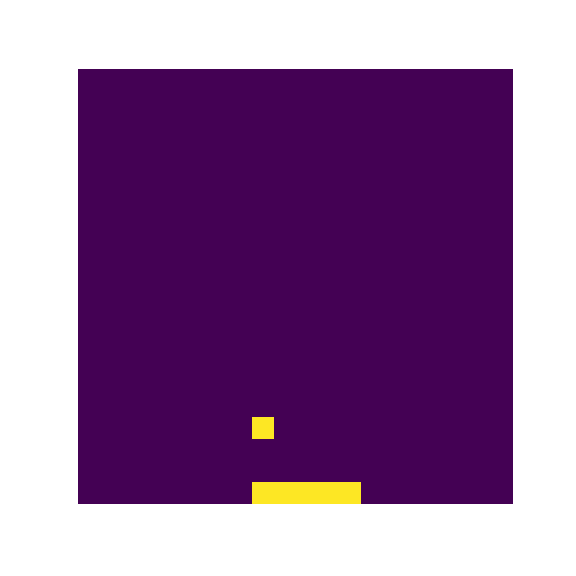
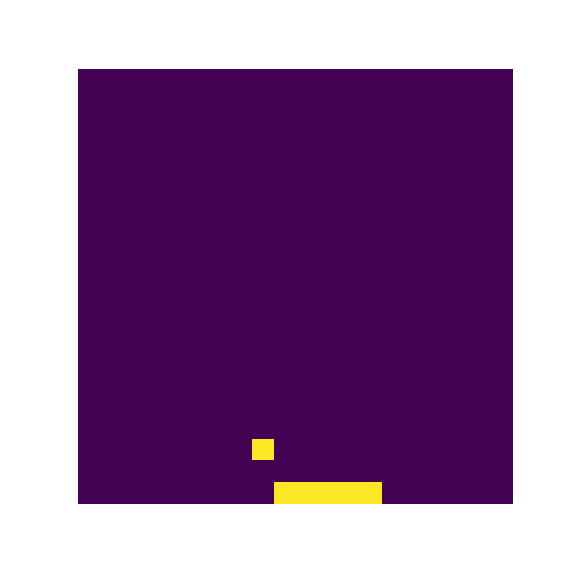
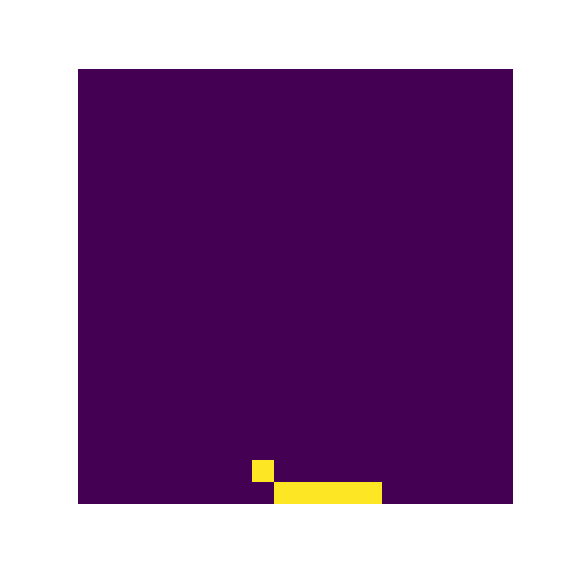
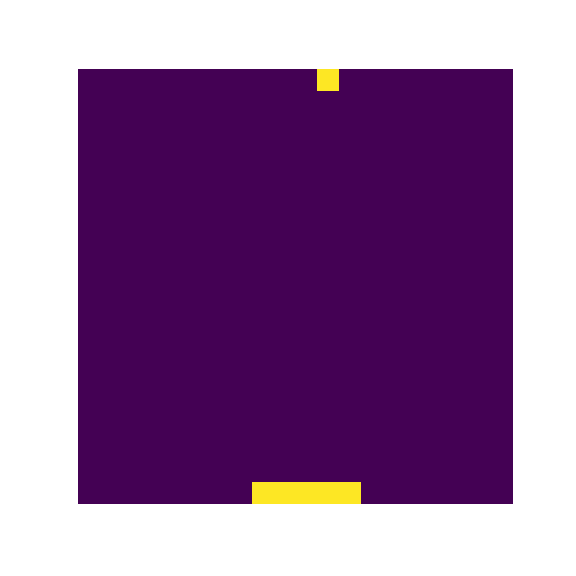
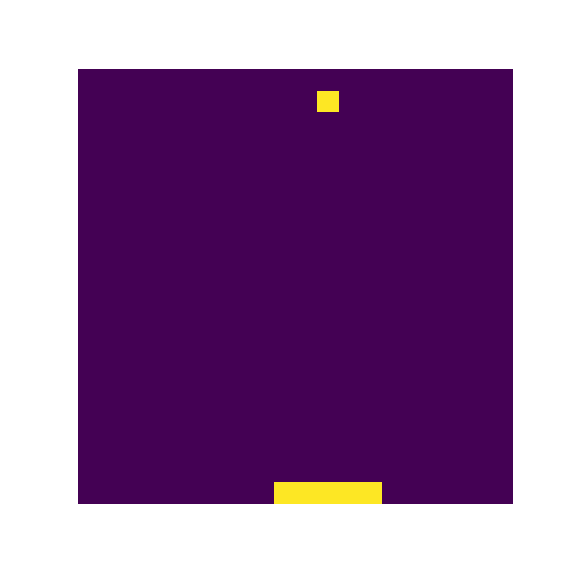
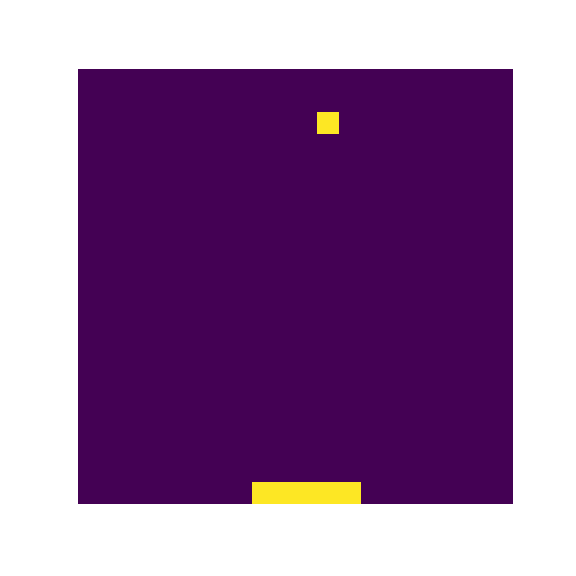
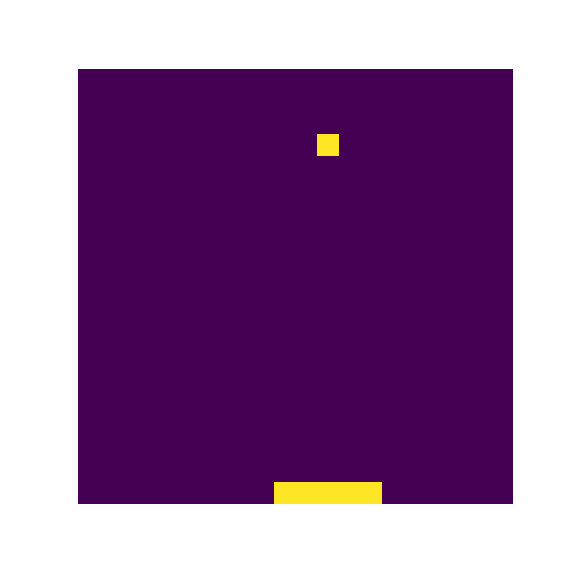
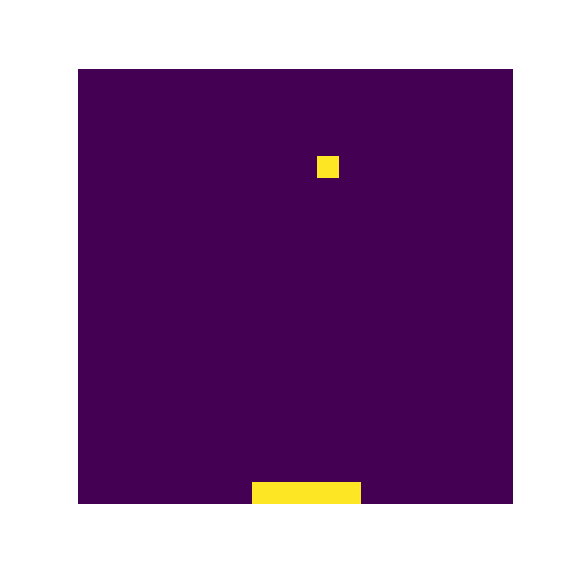
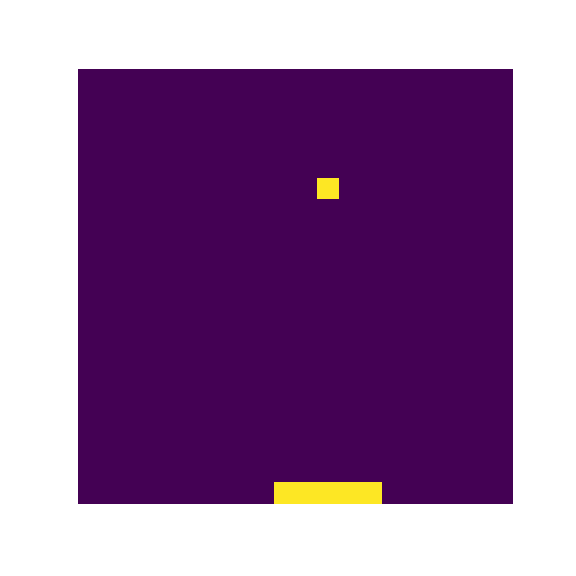
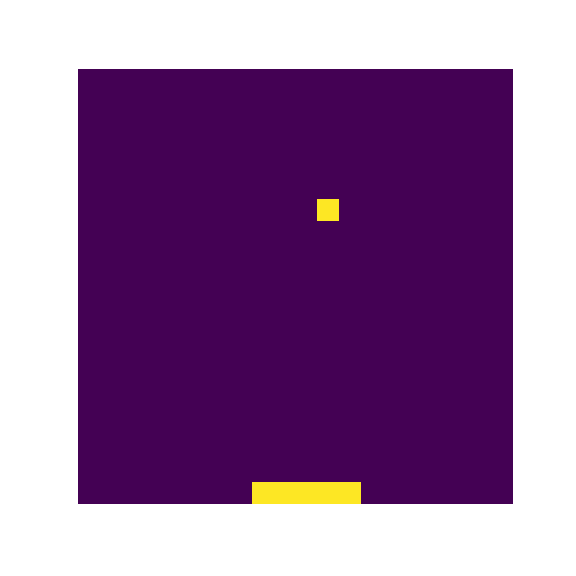
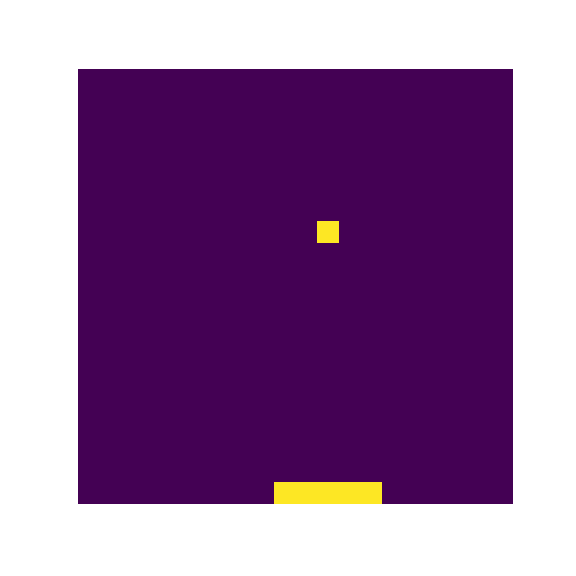
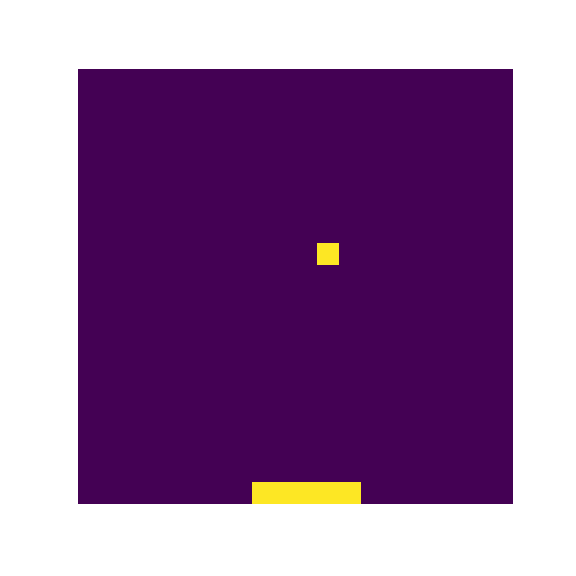
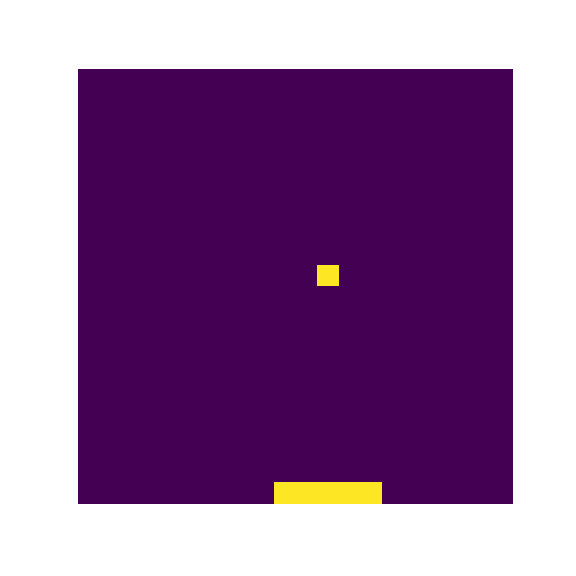
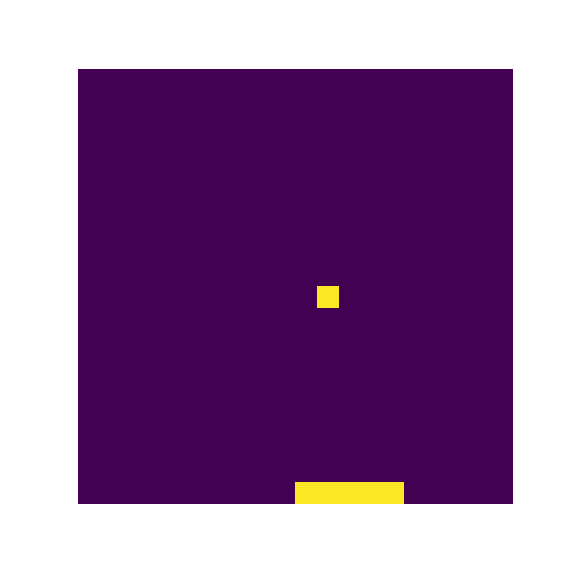
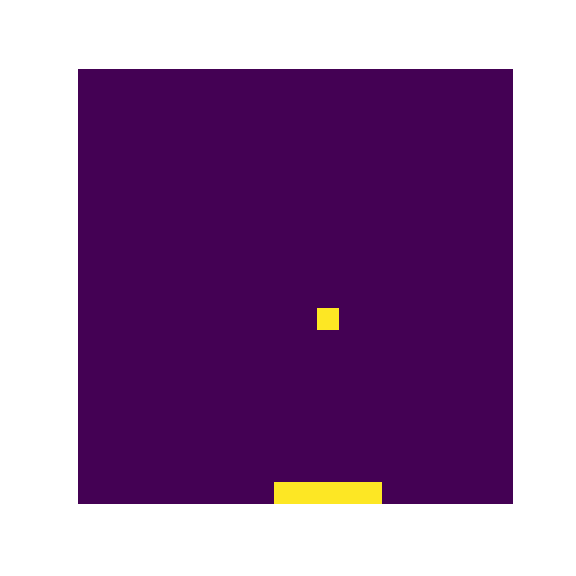
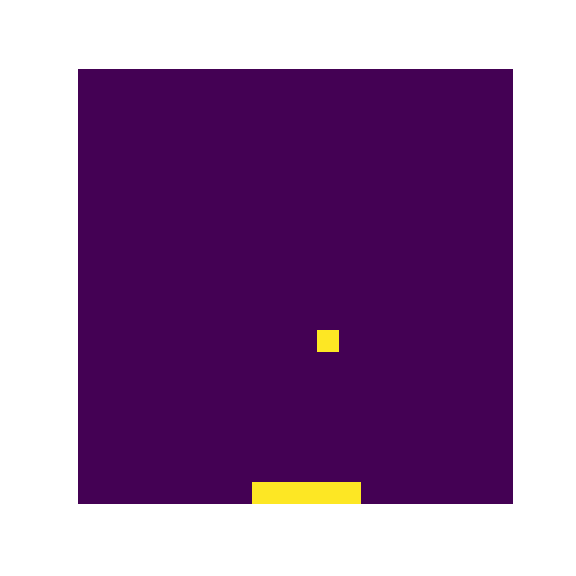
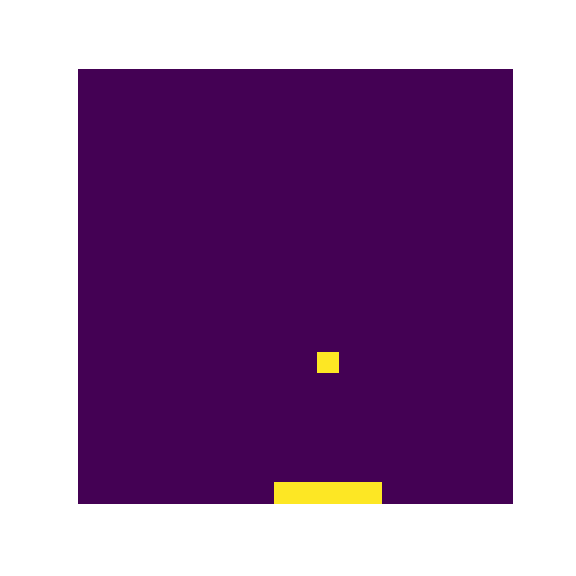
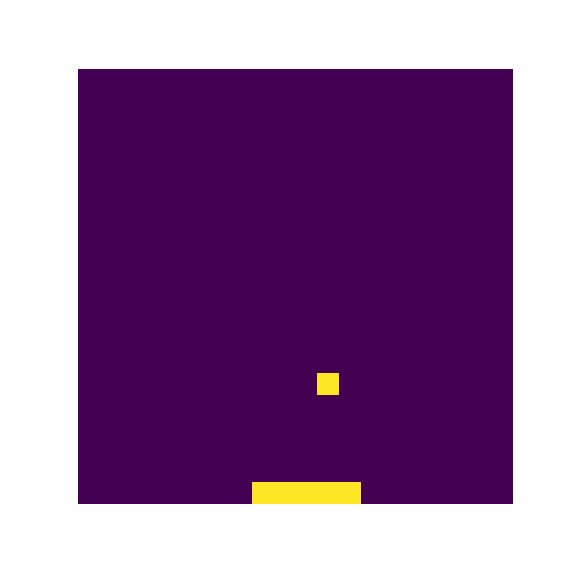
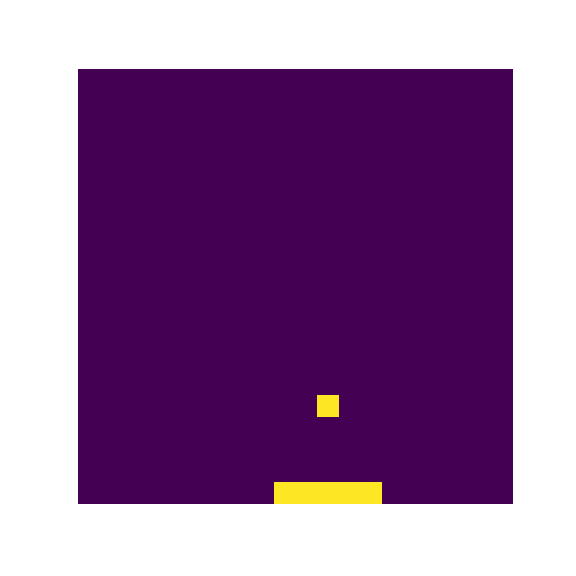
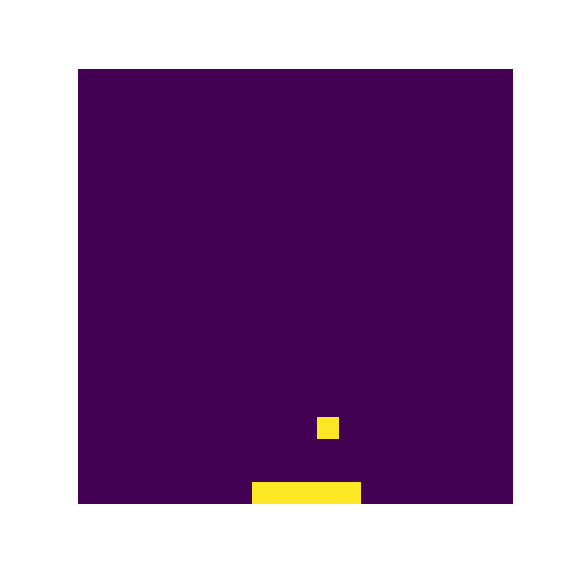
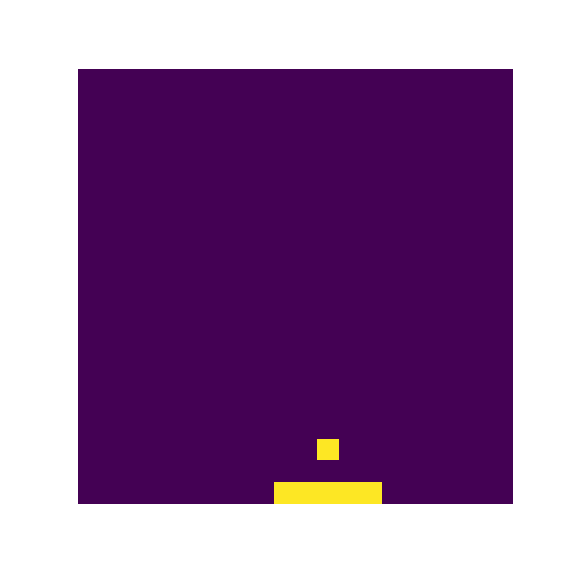
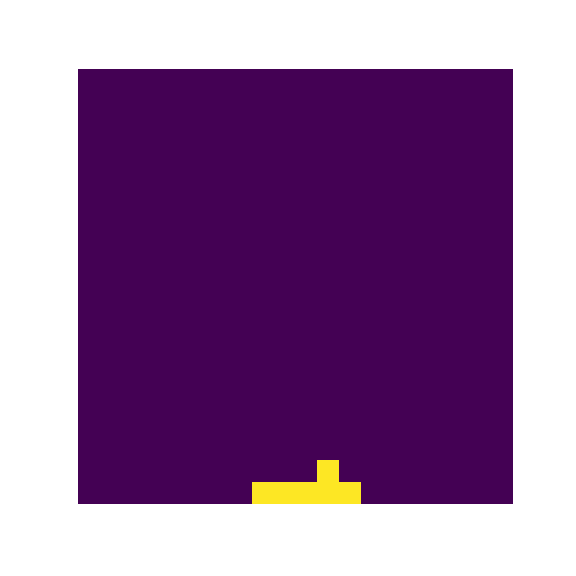
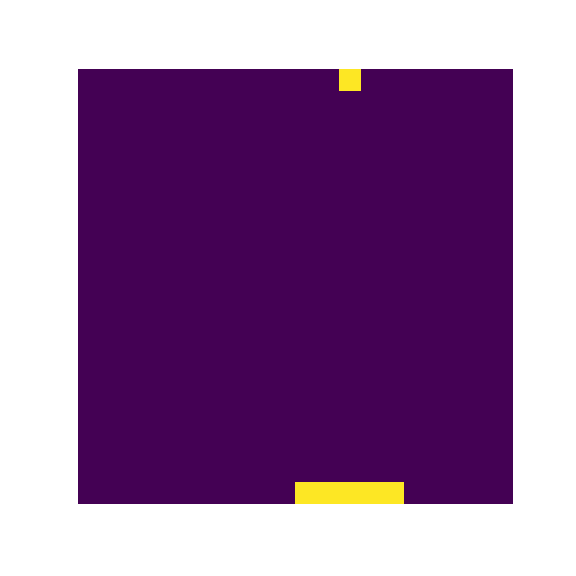
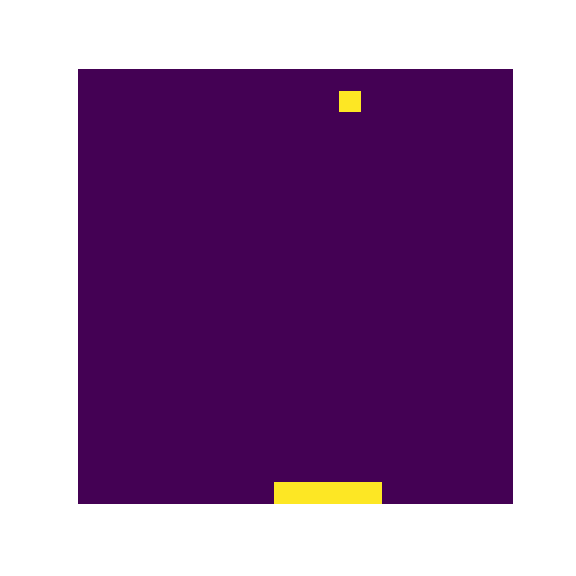
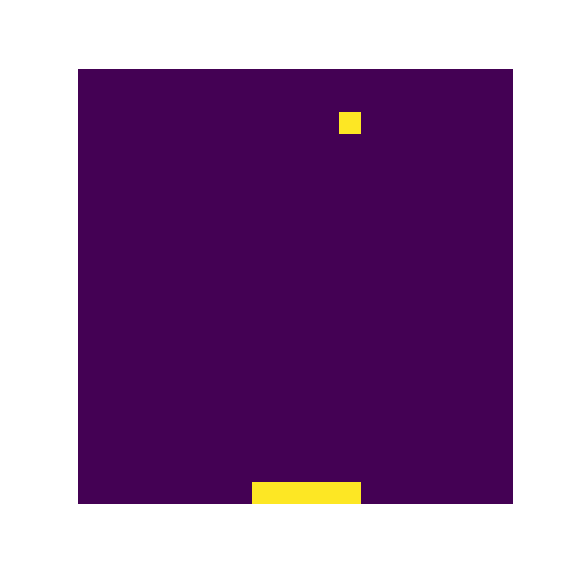
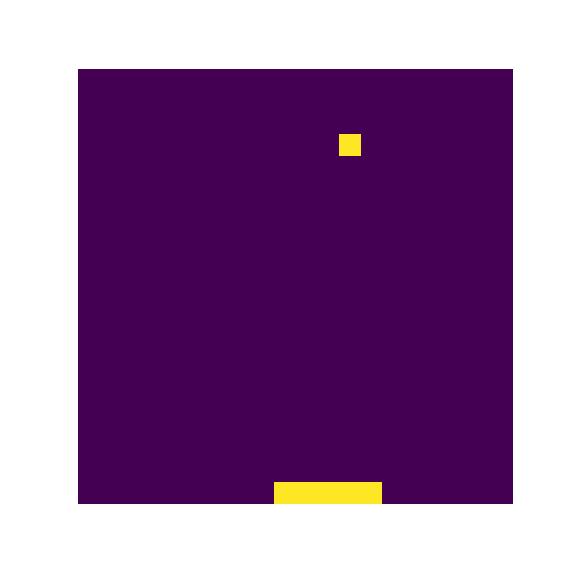
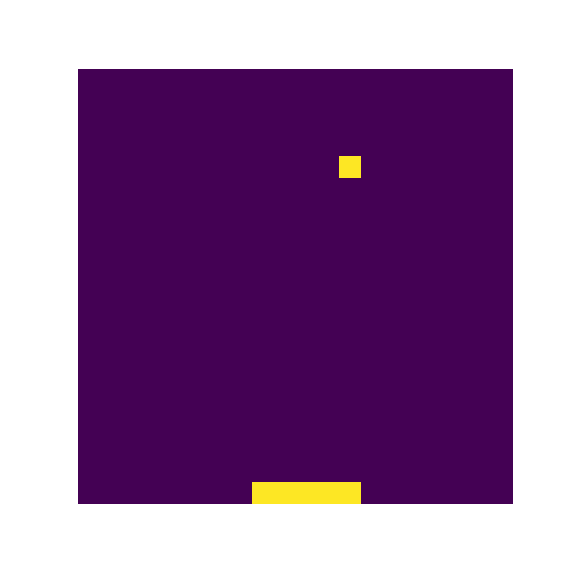
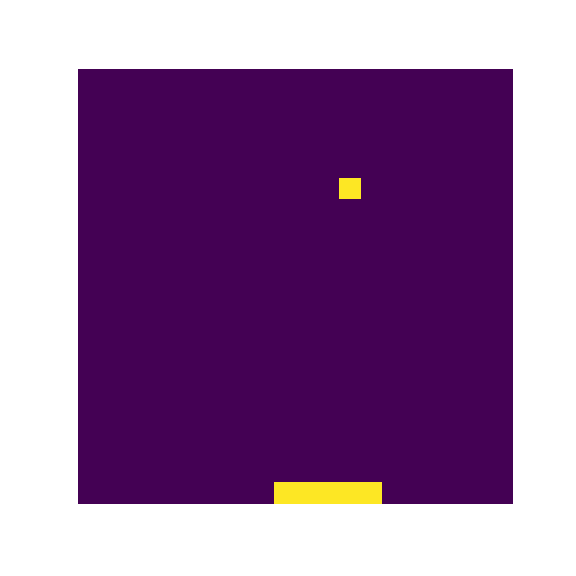
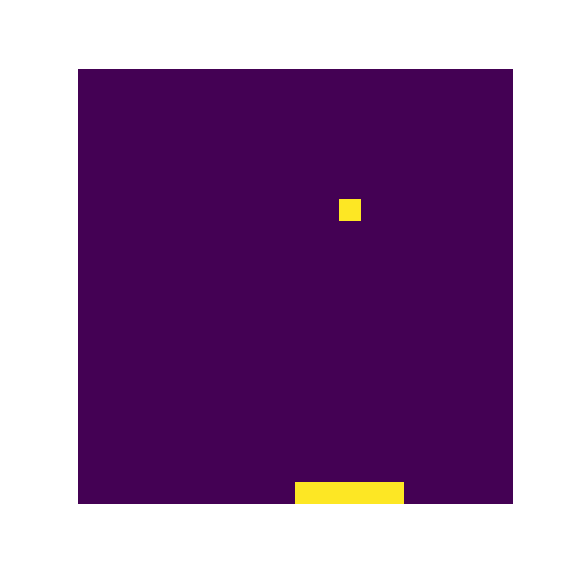
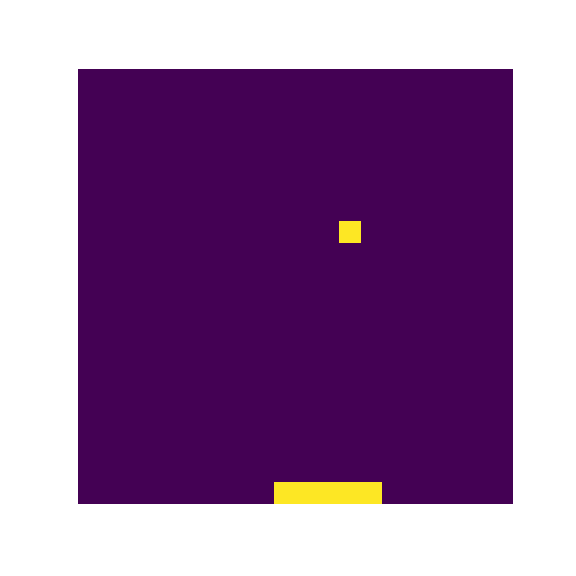
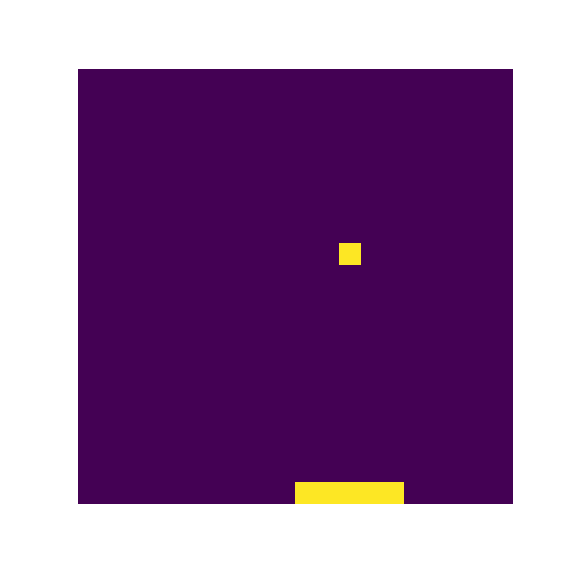
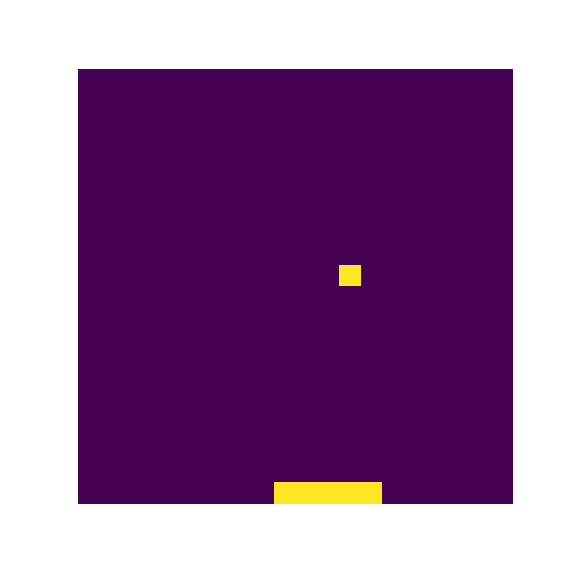
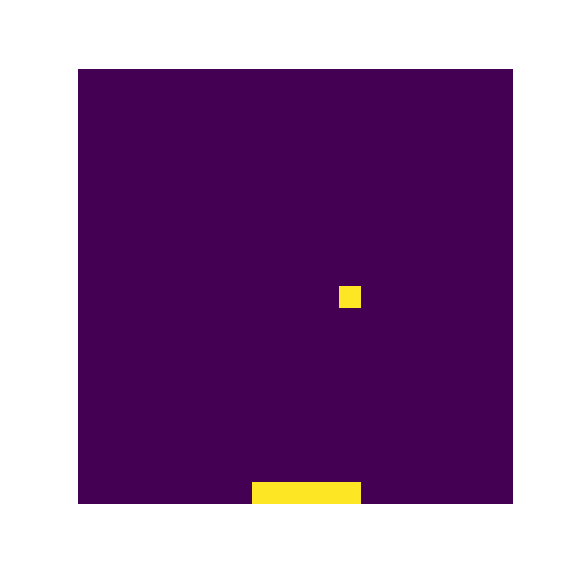
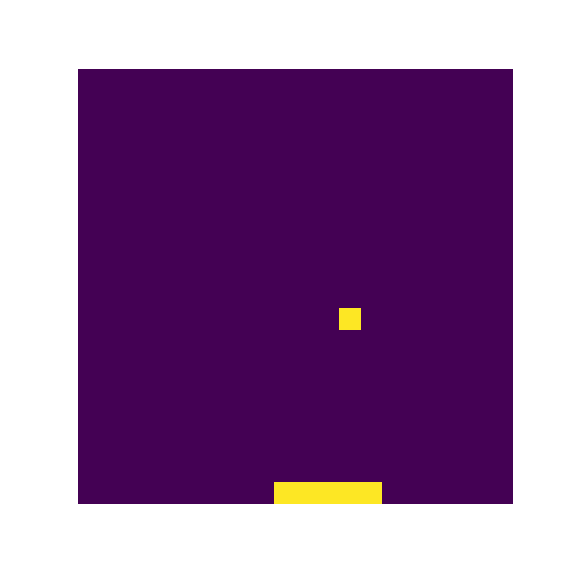
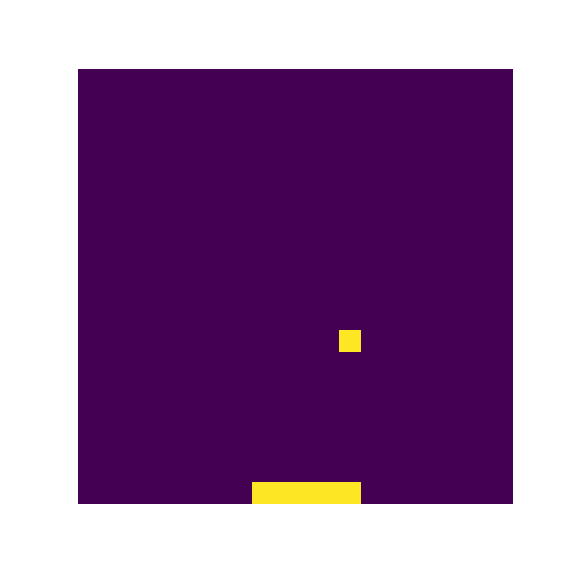
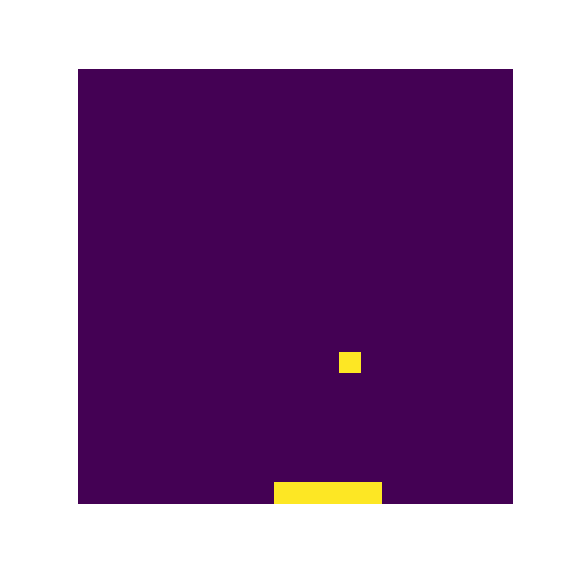
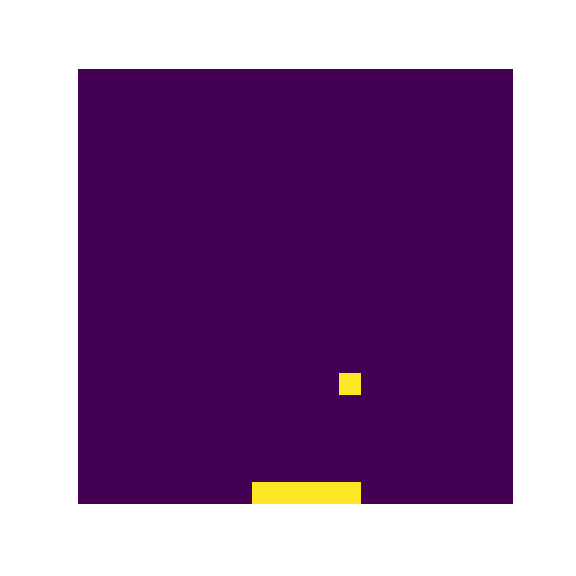
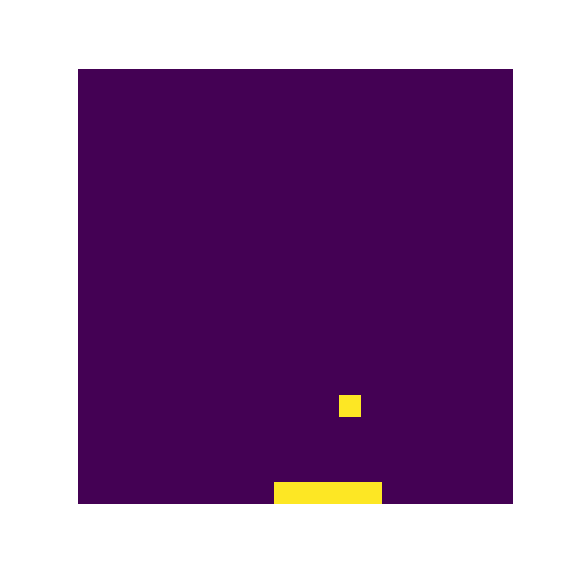
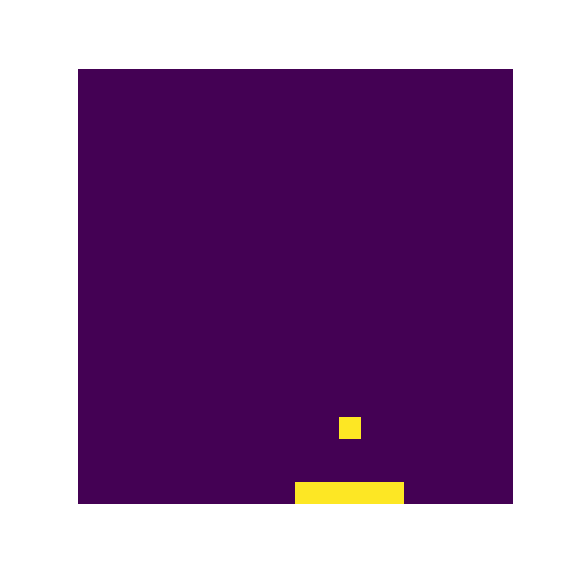
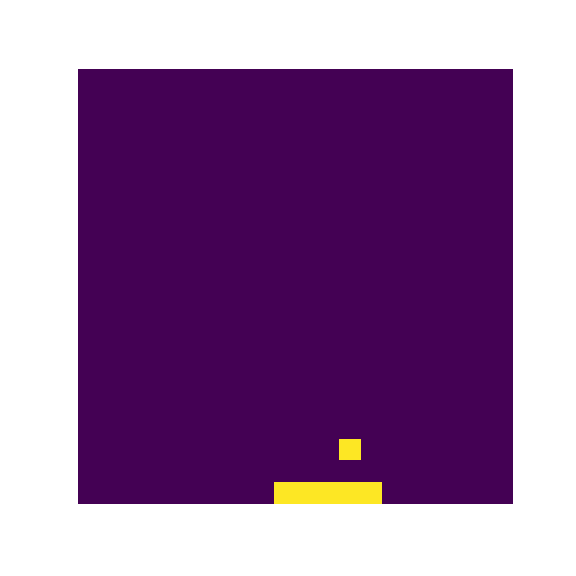
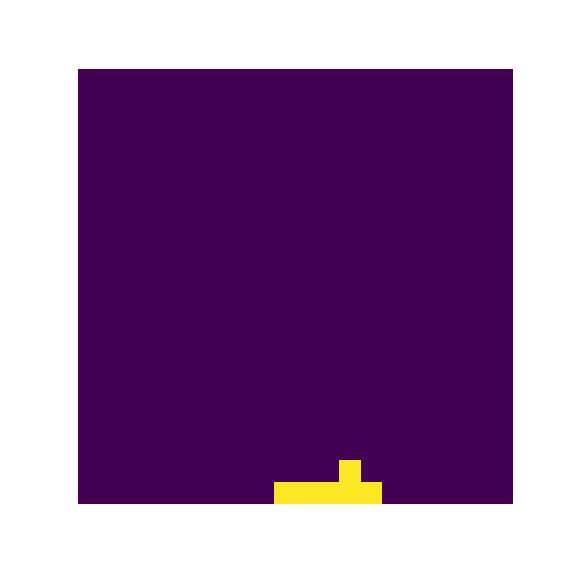
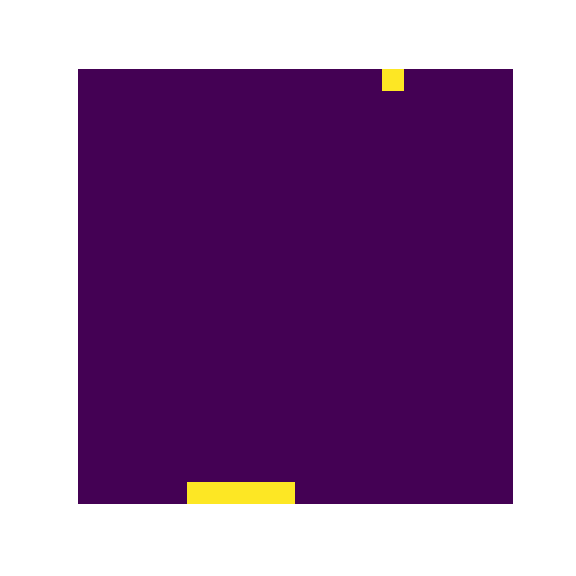
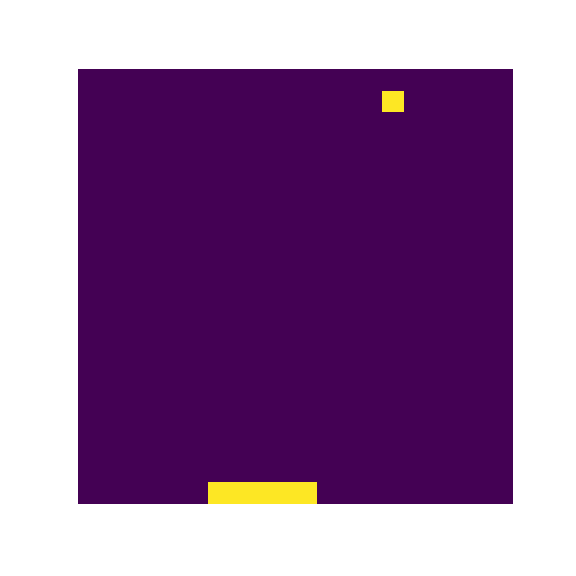
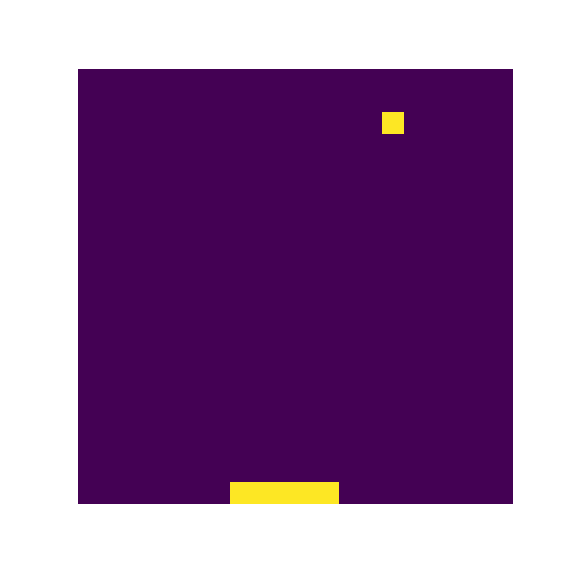
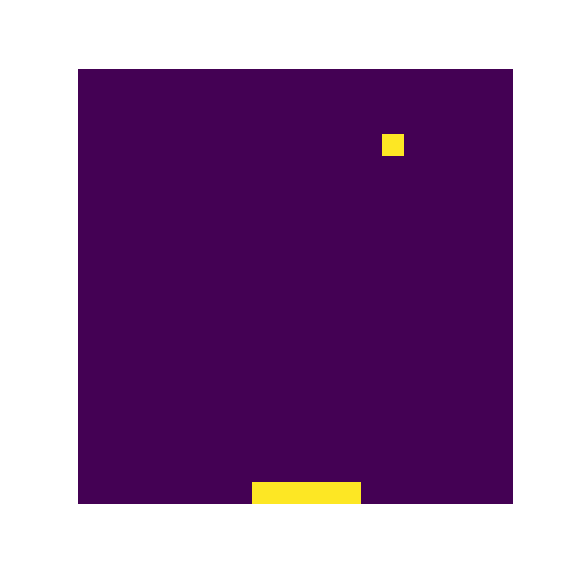
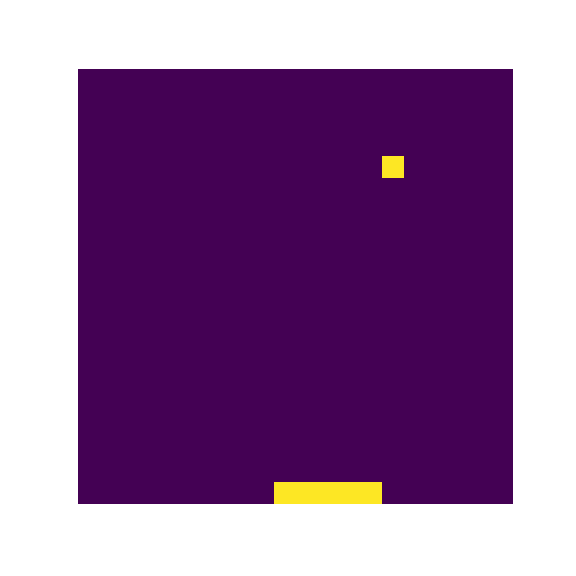
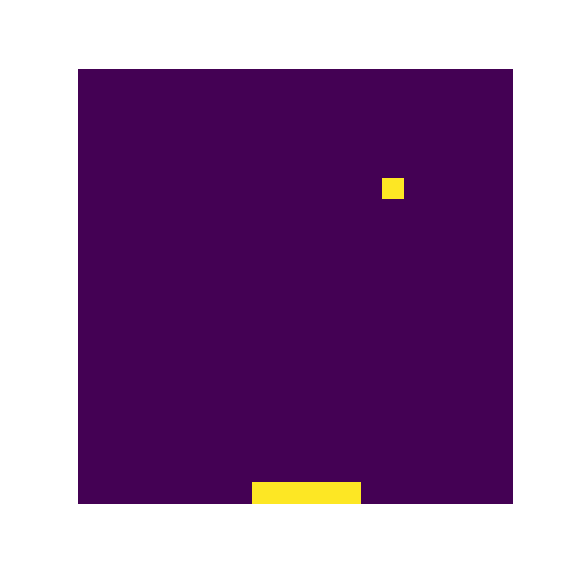
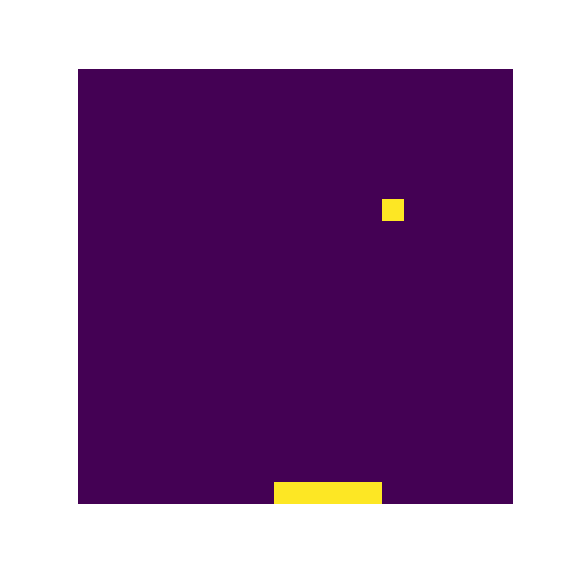
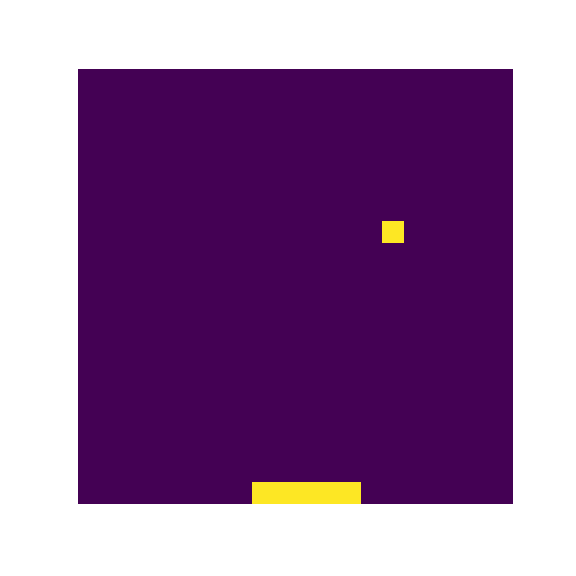
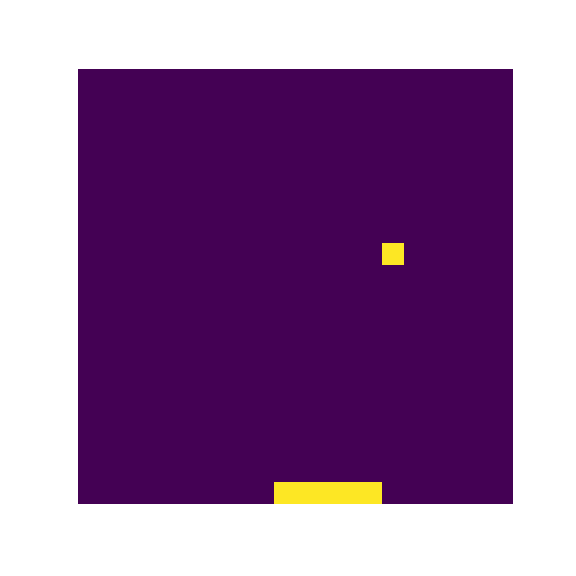
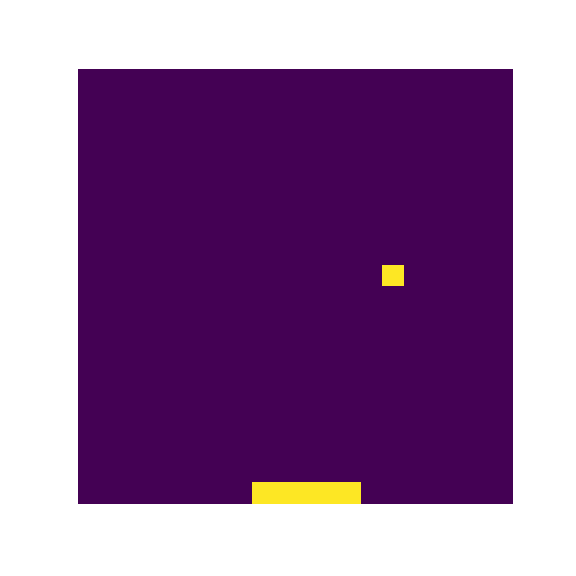
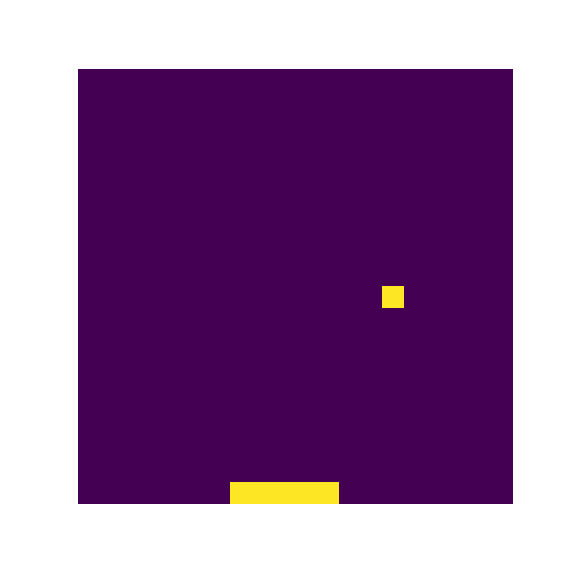
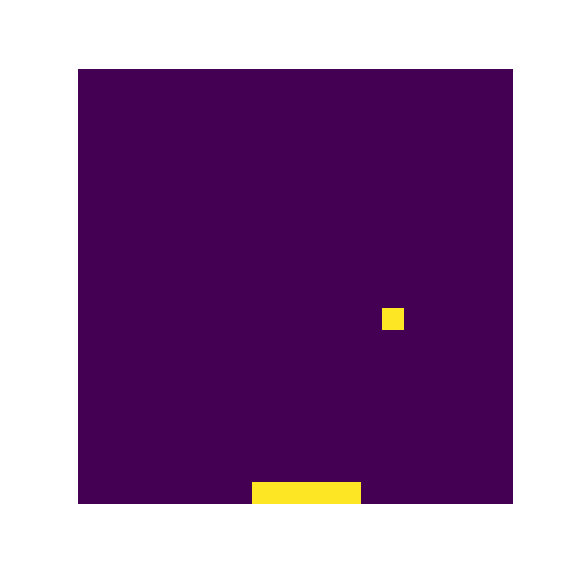
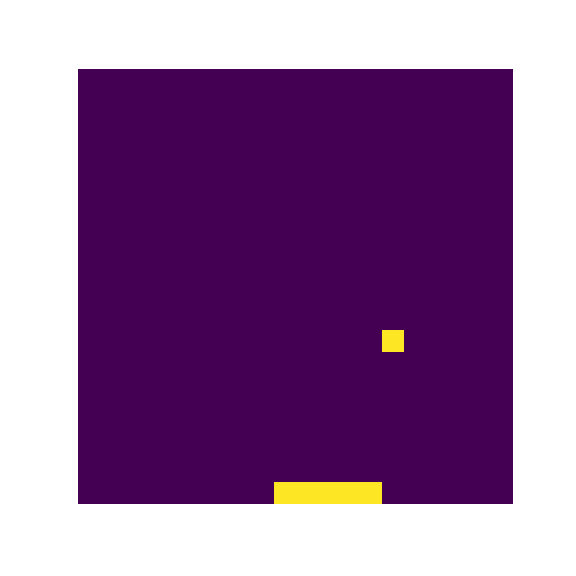
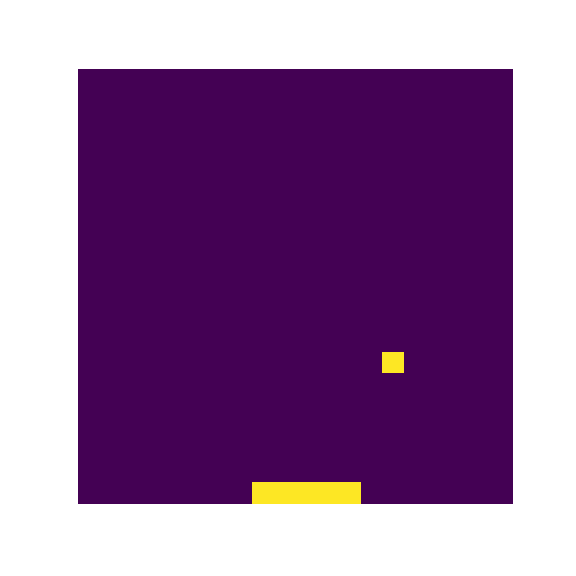
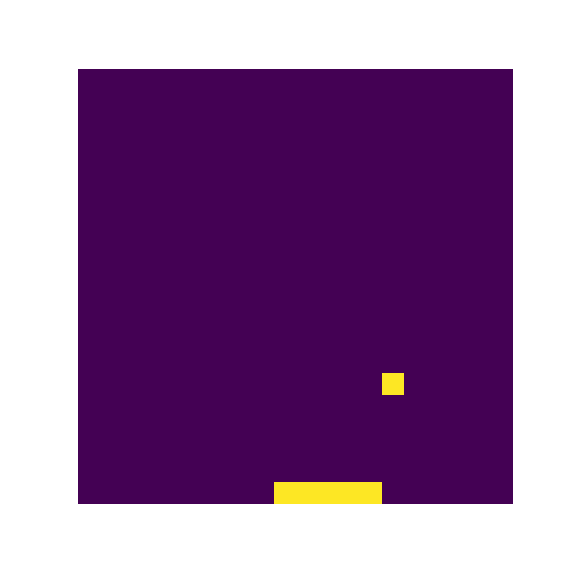
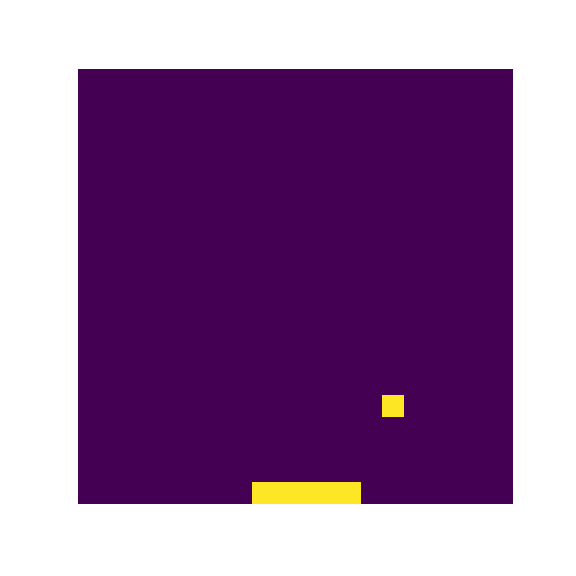
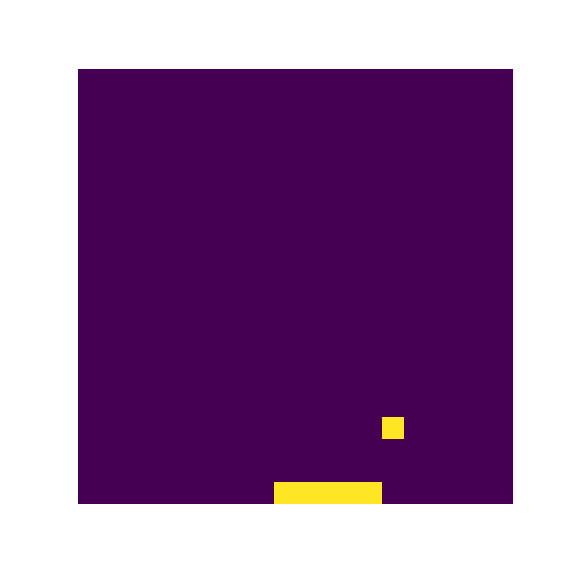
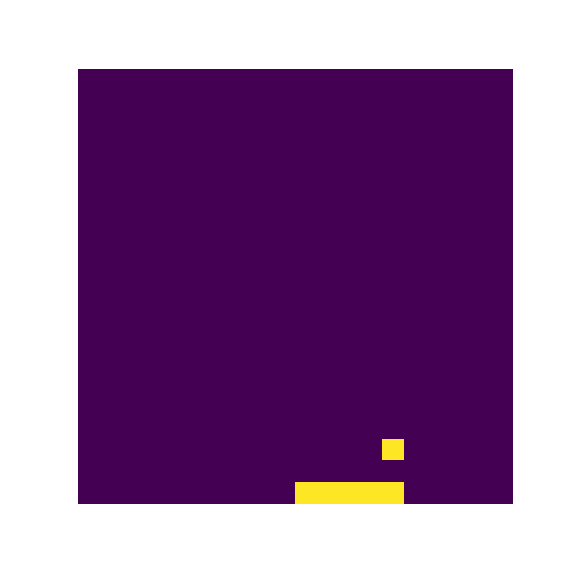
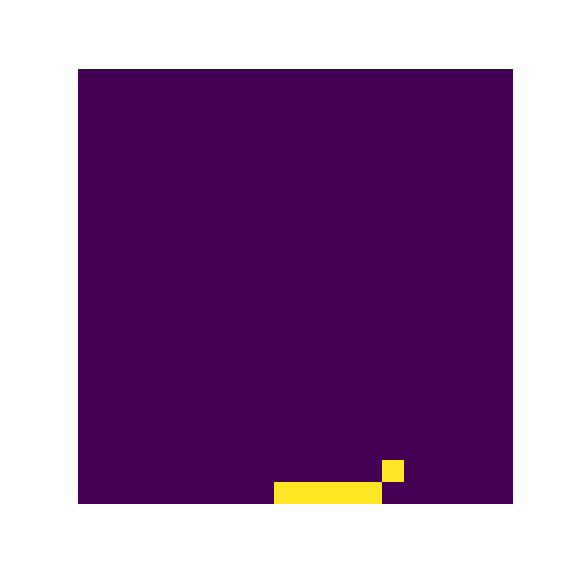
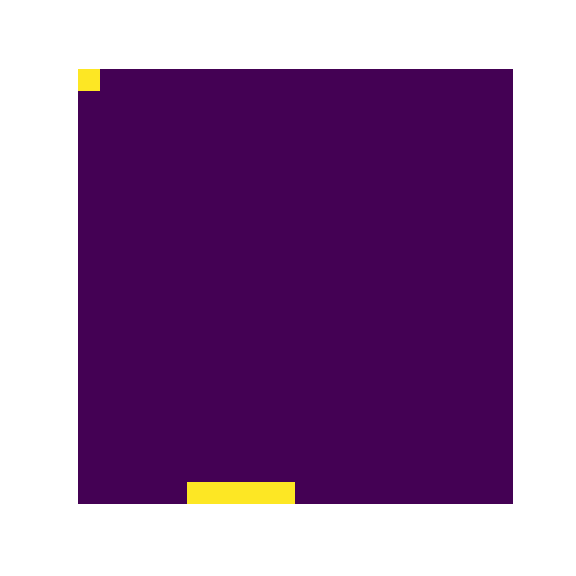
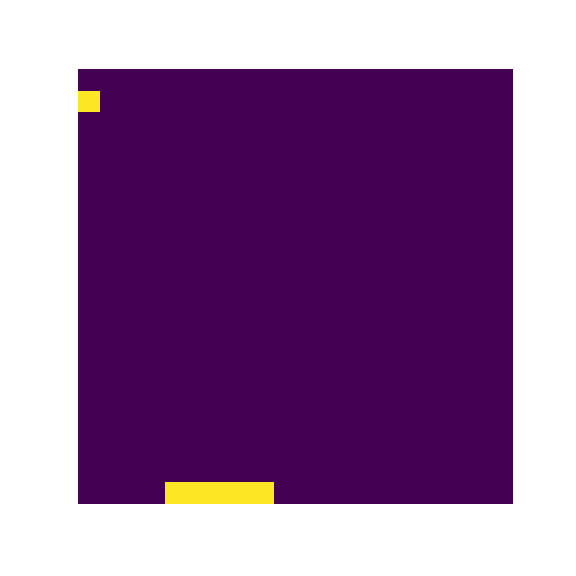
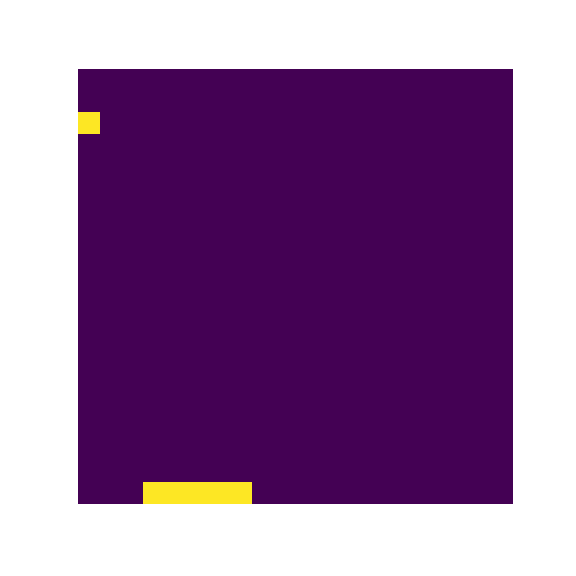
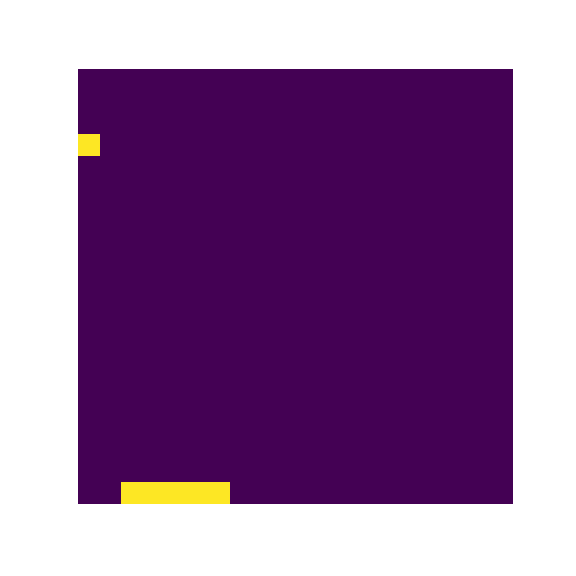
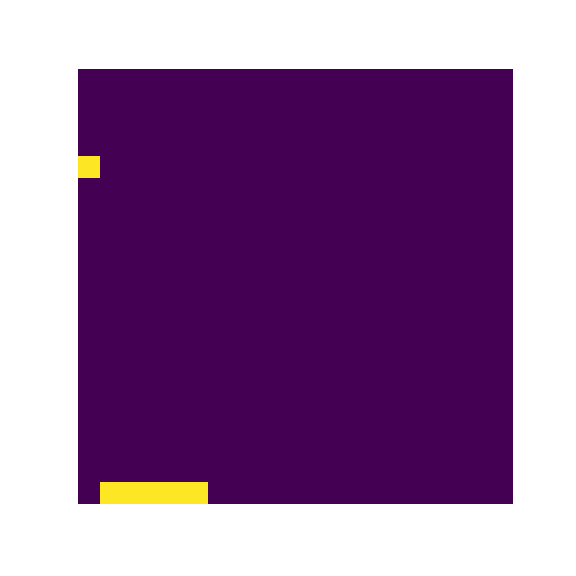
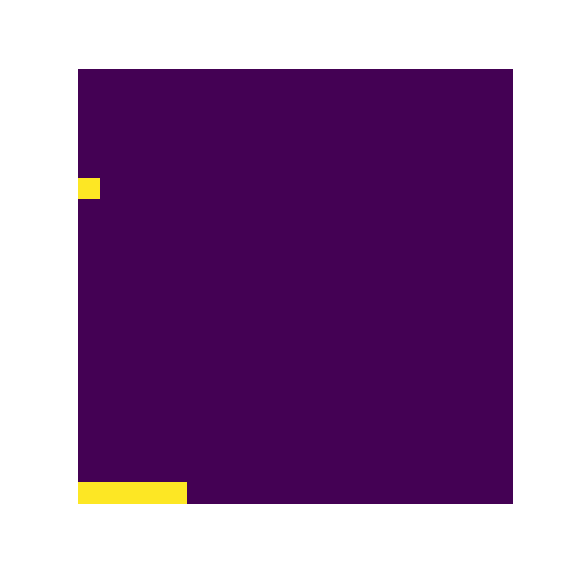
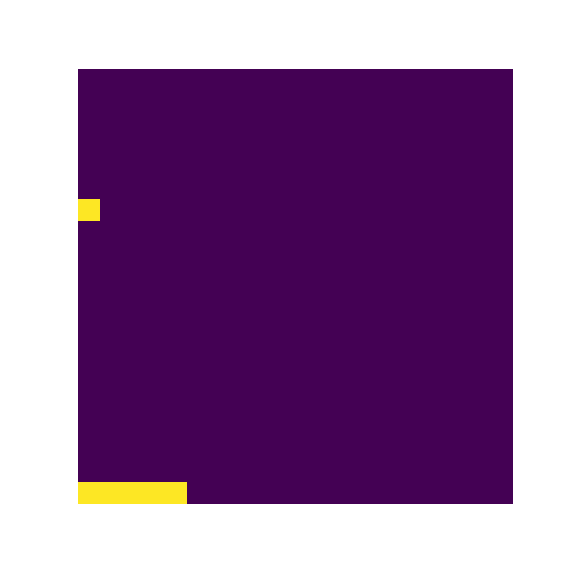
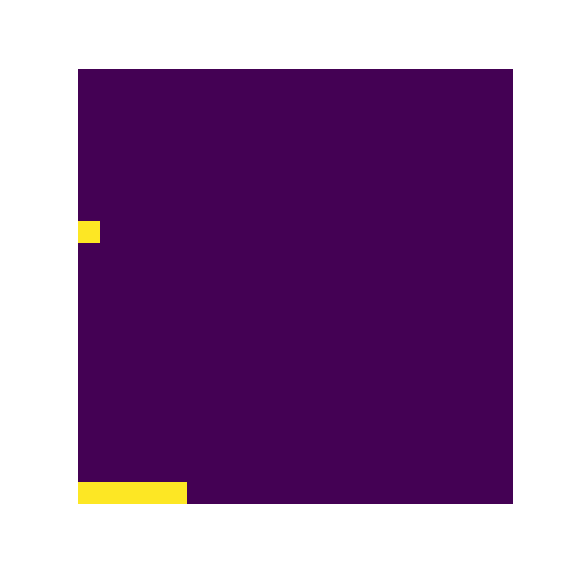
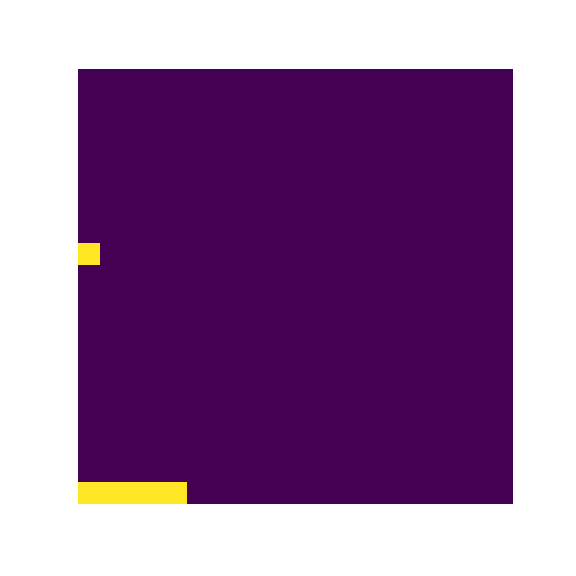
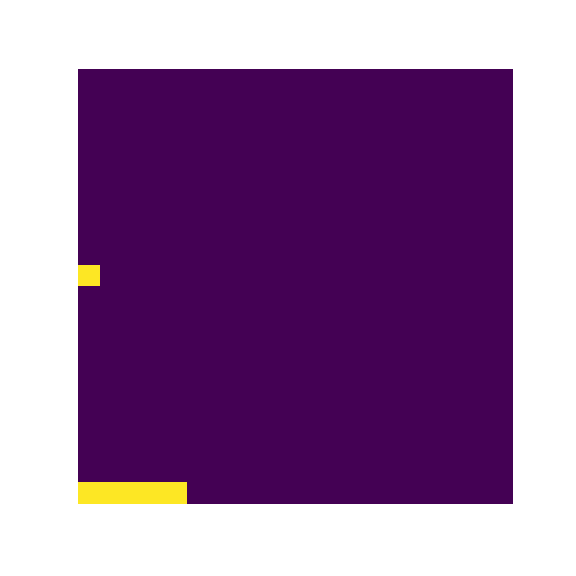
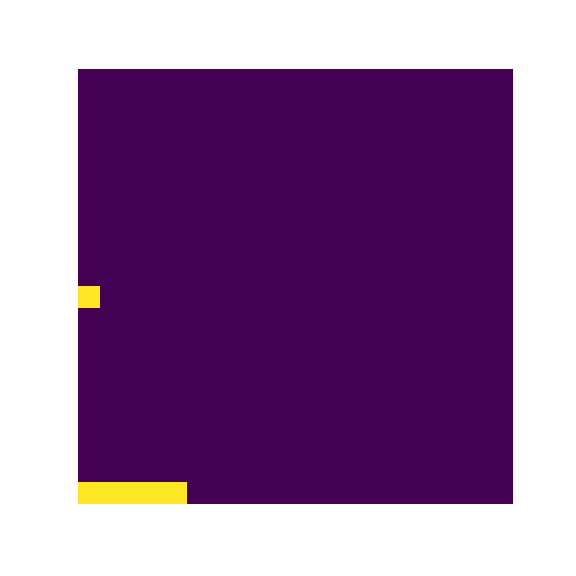
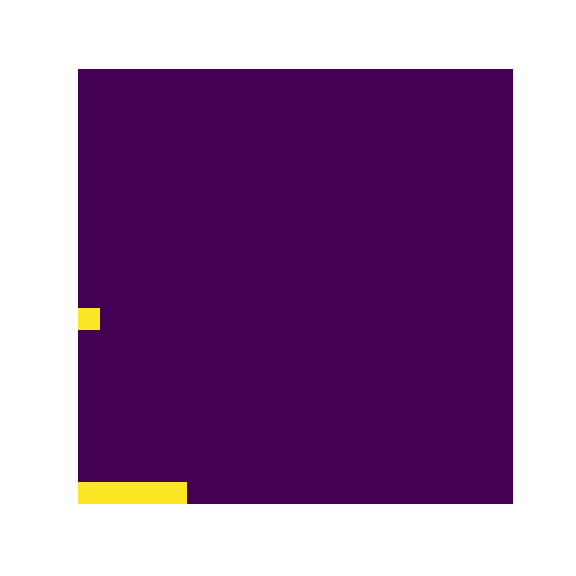
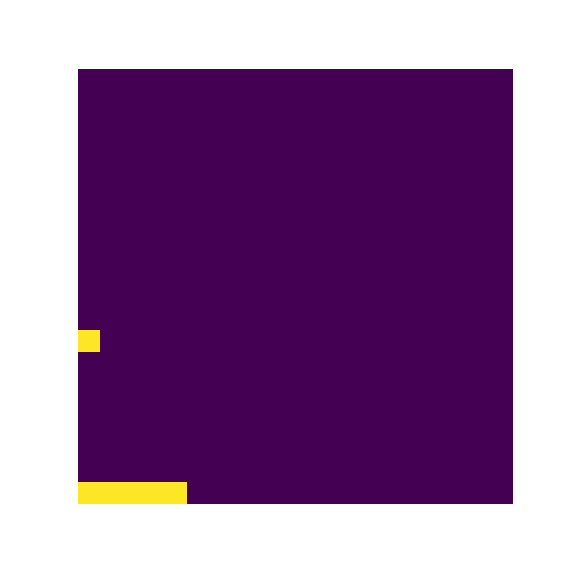
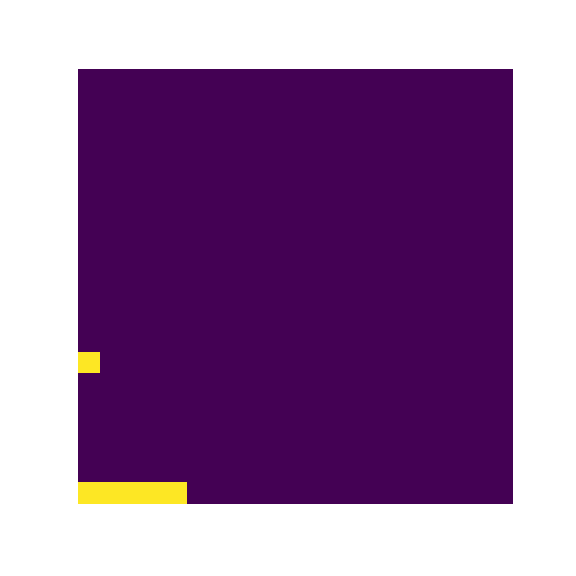
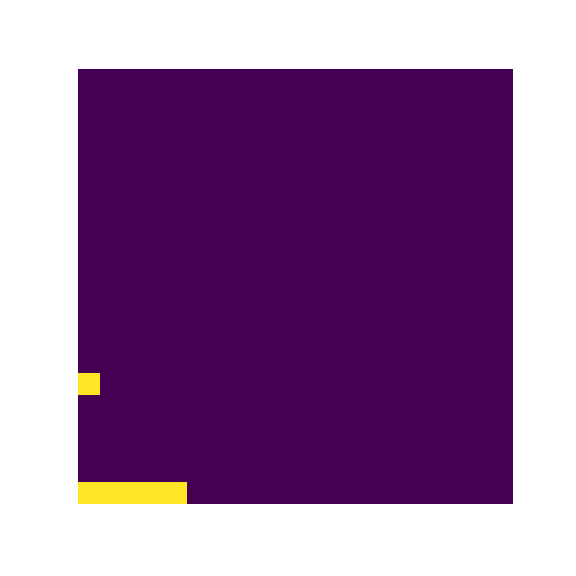
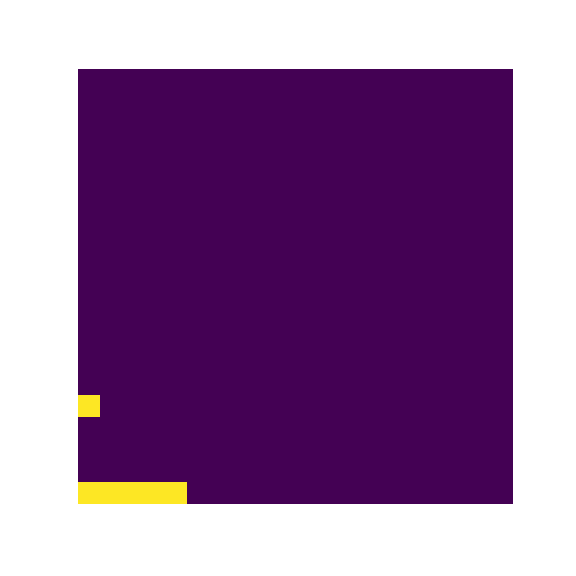
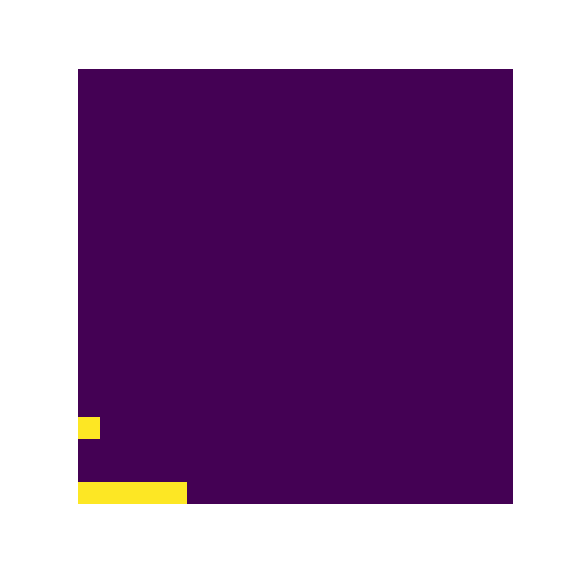
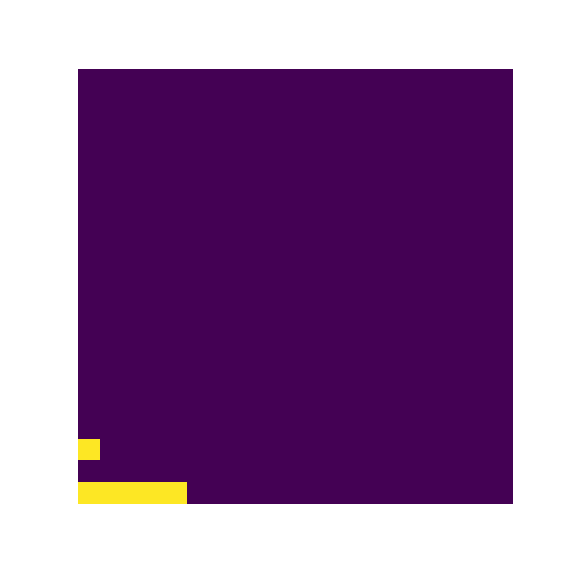
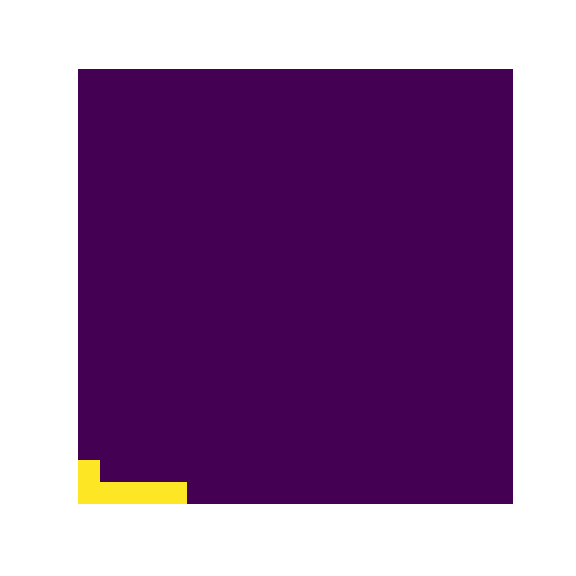
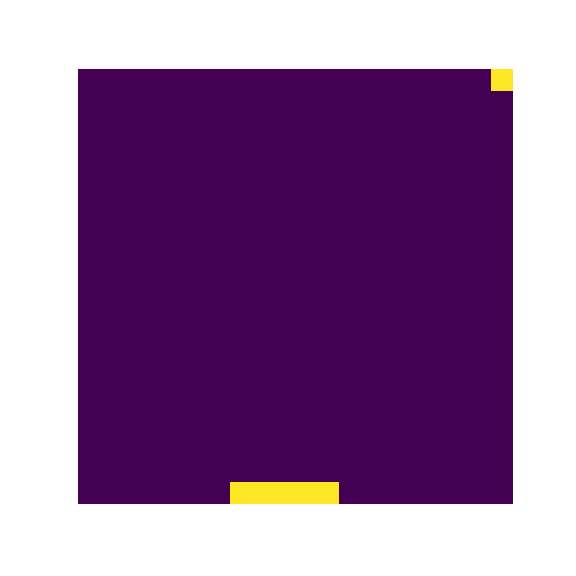
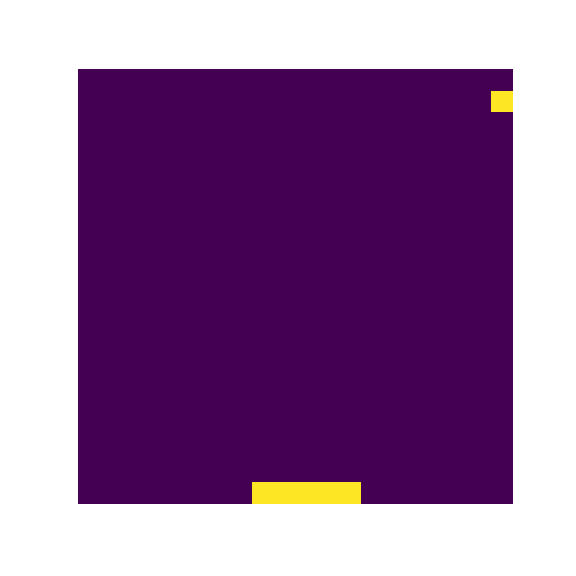
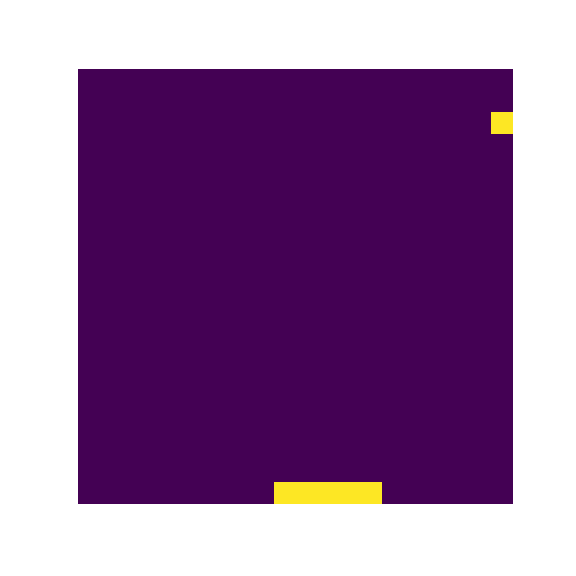
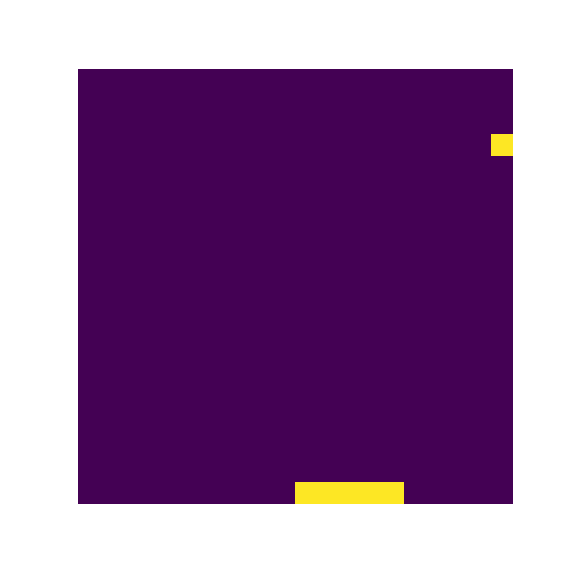
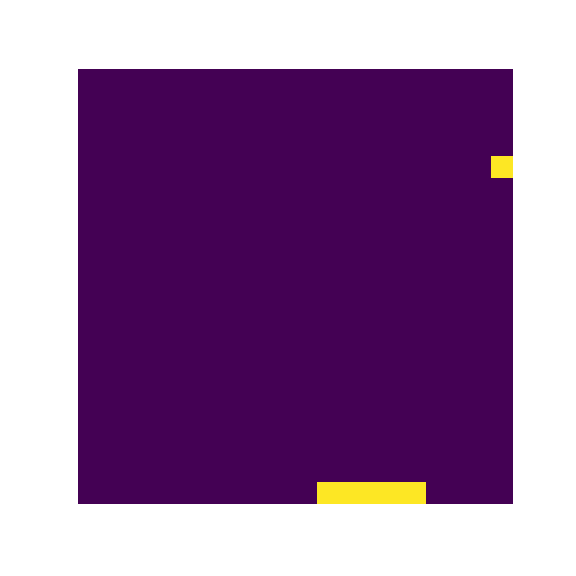
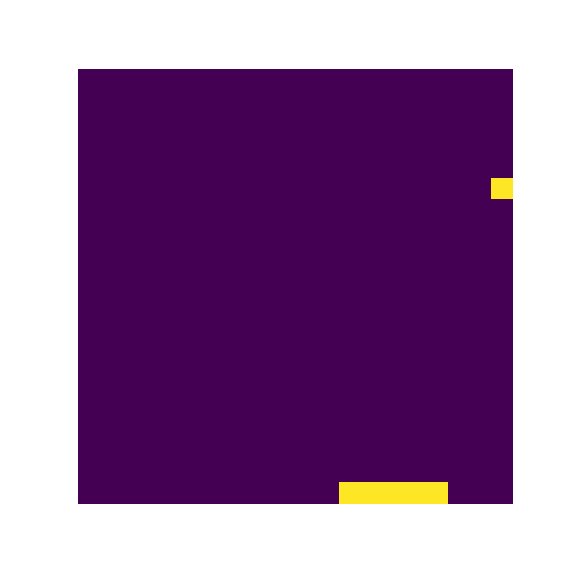
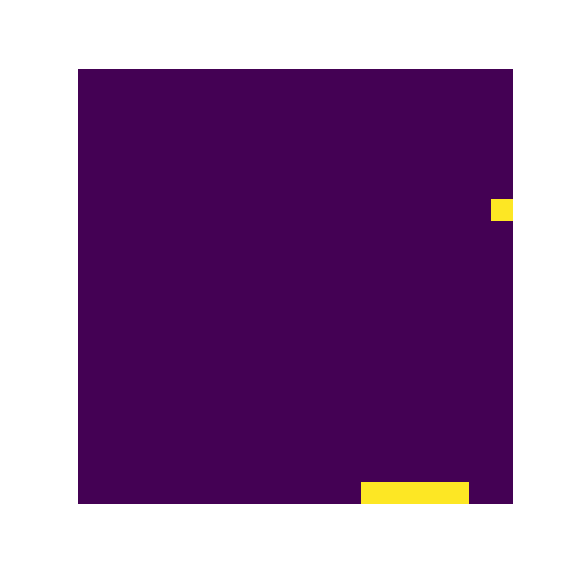
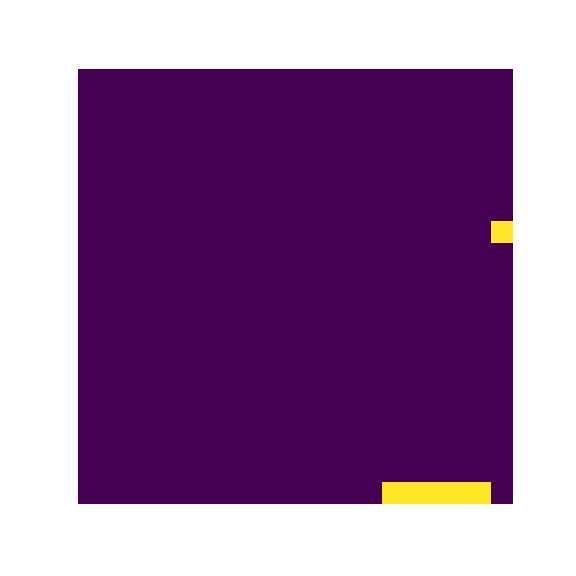
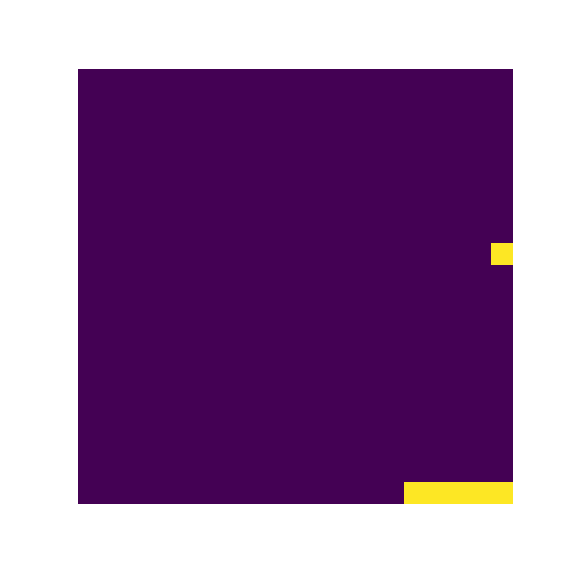
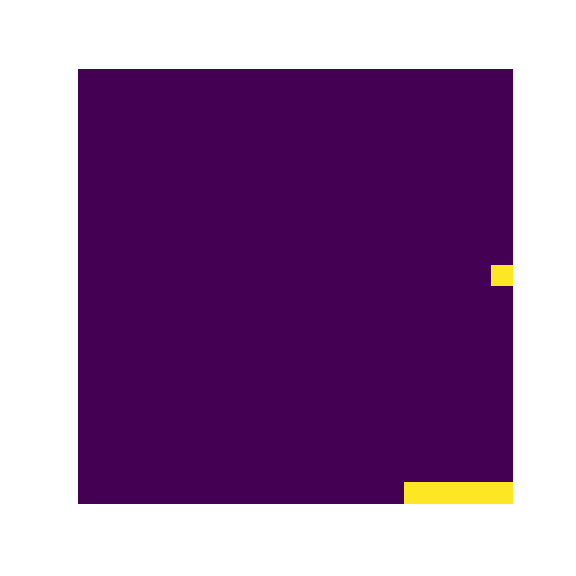
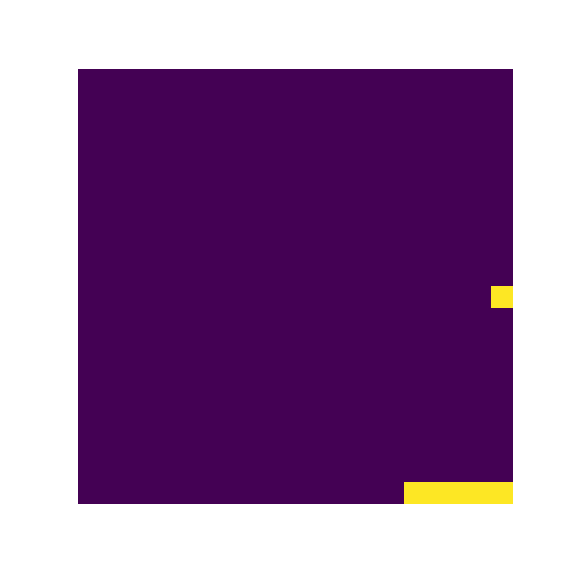
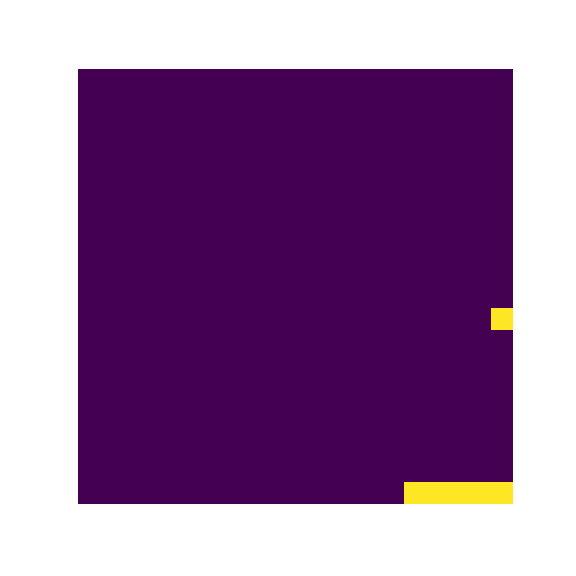
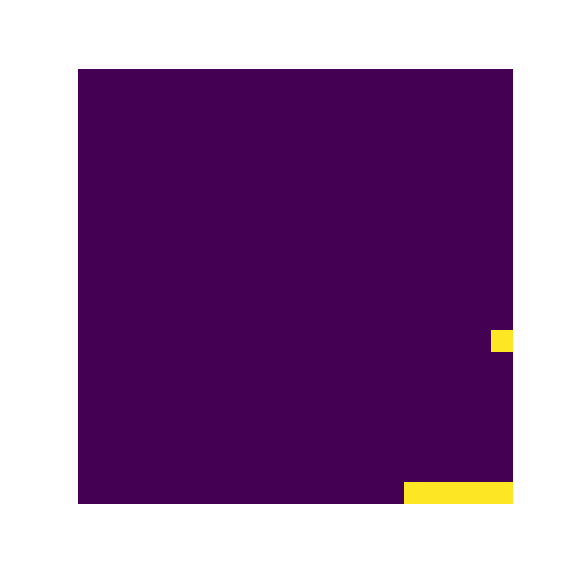
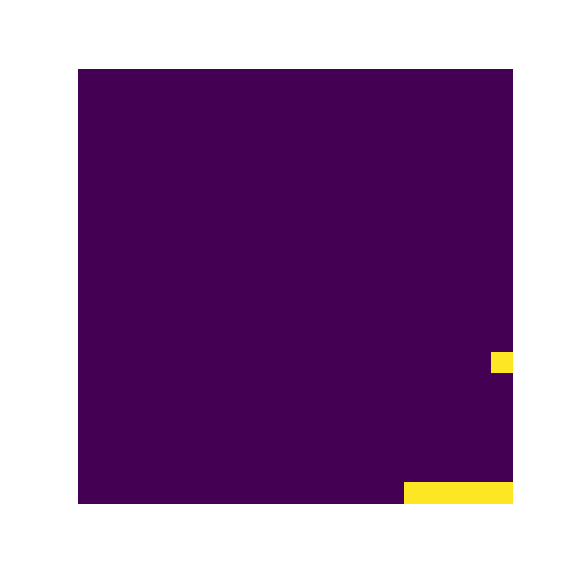
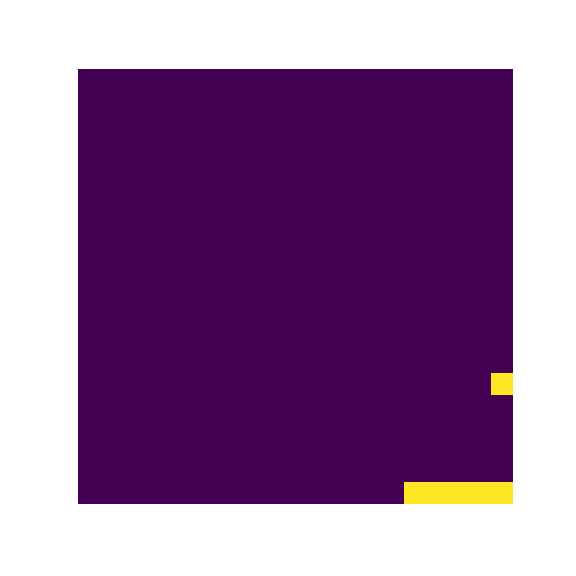
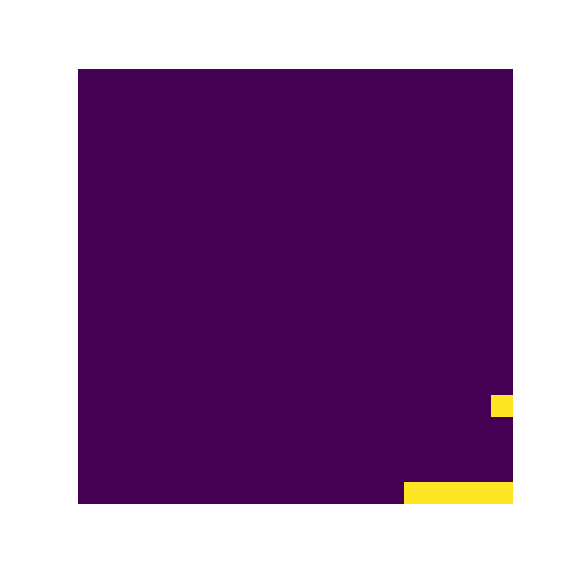
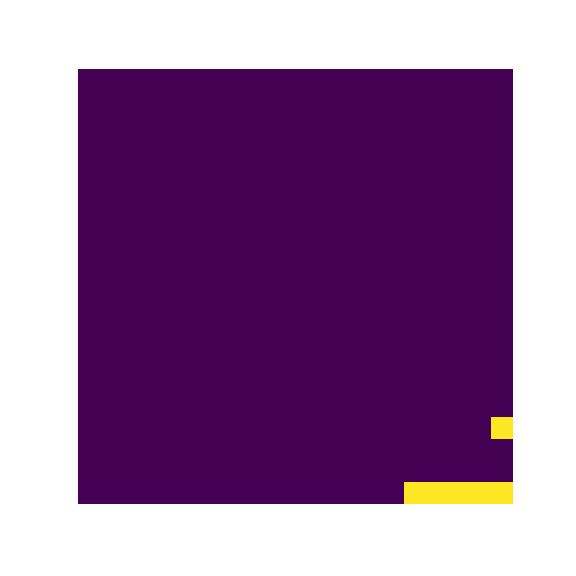
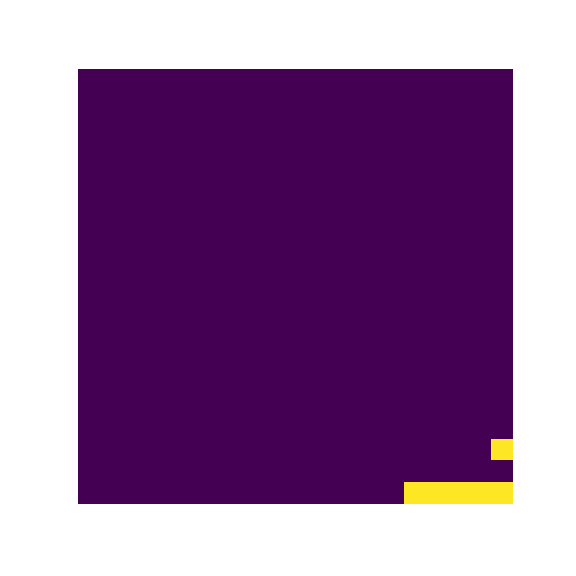
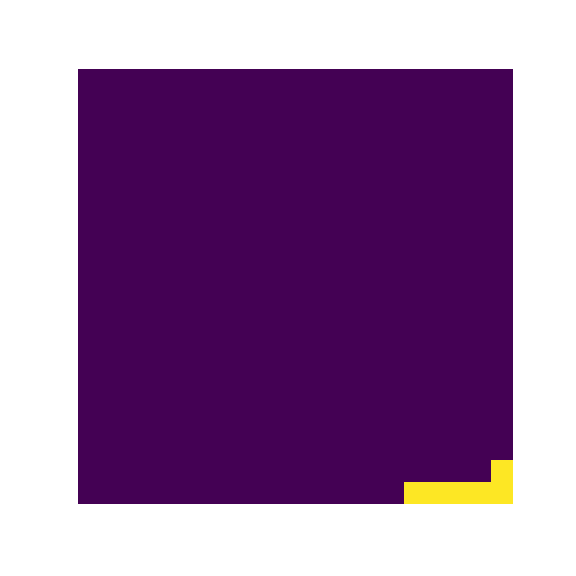

In [4]:
# 動画の保存と描画
display_frames_as_gif(frames, env)